# ECS7024 Statistics for Artificial Intelligence and Data Science

## Coursework 3

The overall aim of this notebook is to provide sufficient solution to Coursework 3.

## Table of Contents

1. Section 1 Introduction
    1. Section 1.1 Outline
    1. Section 1.2 Introducing the Data
    1. Section 1.3 The Variables
    1. Section 1.4 Data Preparation
1. Section 2 Trends
    1. Section 2.1 General Observations
    1. Section 2.2 The North: North West, Yorkshire and The Humber, and North East Regions
    1. Section 2.3 The Midlands: East Midlands and West Midlands Regions
    1. Section 2.4 The South: East of England, South East, South West without London
    1. Section 2.5 London
    1. Section 2.6 Conclusion on Trends
1. Section 3 Price Changes
    1. Section 3.1 Data Preparation
    1. Section 3.2 The North: North West, Yorkshire and The Humber, and North East Regions
    1. Section 3.3 The Midlands: East Midlands and West Midlands Regions
    1. Section 3.4 The South: East of England, South East, South West, London
    1. Section 3.5 Price Change Comparison between Regions
1. Section 4 Statistical Analysis
    1. Section 4.1 Cross-tabulation
    1. Section 4.2 Chi-square test (using the G-test statistic)
    1. Section 4.3 Interpretation  

In [2]:
# Preamble -- import of necessary packages and libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline

## Section 1 Introduction
This notebook presents an analysis of property data in the nine regions of England, which contains information about the average prices of four different properties: flats, detached, semi and terraced properties over a period of 36 months. The aim of the analysis is to explore trends between different regions, patterns in price changes and whether there is statistical evidence that the change in the price of flats has affected all the regions similarly. 

### Section 1.1 Outline
Section 1 loads the data, introduces the data and the variables and prepares the data for our analysis. Section 2 showcases trends of the prices considering only flats and detached properties within the nine regions over 36 months. Section 3 explores how the flat prices have changed in each area from July 2017 to July 2018 in each region. Section 4  investigates whether there is evidence that the change in the price of flats has affected all the regions similarly.

### Section 1.2 Introducing the Data
We load the price data from the CSV file average-property-price.csv, which has information about the average price of four types of properties over 36 months in different country areas.

In [3]:
prices = pd.read_csv('average-property-price.csv')
prices.head()

,Date,Area,Code,Detached,Semi,Terraced,Flat
0,01/09/2016,Hartlepool,E06000001,179323.3934,108357.4457,77192.90613,62078.20672
1,01/10/2016,Hartlepool,E06000001,178880.9745,107765.1346,76294.05974,61893.84174
2,01/11/2016,Hartlepool,E06000001,179855.0608,107886.9468,76066.73993,61909.33647
3,01/12/2016,Hartlepool,E06000001,182847.8194,109312.3743,77019.16134,62919.44401
4,01/01/2017,Hartlepool,E06000001,177454.1433,105828.3642,74522.27530,60770.80795


We load the location data from the CSV file location-codes.csv, which has information about the relationship between government areas and regions.

In [3]:
location = pd.read_csv('location-codes.csv')
location.head()

,AuthorityCode,AuthorityName,RegionCode,RegionName
0,E06000001,Hartlepool,E12000001,North East
1,E06000002,Middlesbrough,E12000001,North East
2,E06000003,Redcar and Cleveland,E12000001,North East
3,E06000004,Stockton-on-Tees,E12000001,North East
4,E06000005,Darlington,E12000001,North East


### Section 1.3 The Variables
The following table presents the variables, their brief description and their respective type for the data frame price.

| Variable      |      Description             | Type | 
|:--------------|:-----------------------------|:------:|
|Date           | A date - see below                       | string |
|Area           | Name of an area or region - see below    | string | 
|Code           | Code of an area or region - see below    | string |
|Detached       | Average sale price of a detached property in this area in this date (month)      | float64 |
|Semi           | Average sale price of a semi-detached property in this area in this date (month) | float64 |
|Terraced       | Average sale price of a terraced property in this area in this date (month)      | float64 |
|Flat           | Average sale price of a flat in this area in this date (month)                   | float64 |

The variable **`Date`** is defined as the first date of the month for a specific year. It ranges from 1st September 2016 to 1st August 2019 and covers a period of 36 months in total.

The variable **`Area`** provides the name of a region or a local government area.

The variable **`Code`** provides the code for the specific area. The area codes are defined by the Office for National Statistics and reflect the hierarchy of government in the UK. The codes are simplified in the context of the data we want to analyse. As such, each area is covered twice at different levels. Level 1 is a region. England has nine different regions: North East, North West, Yorkshire and The Humber, East Midlands, West Midlands, South West, East of England, South East and London. Level 2 describes a local government area. Four local government areas exist: County, London Borough, Metropolitan Borough and English unitary authority. Each government area belongs to one of the nine regions. 

The following table presents the prefixes of the area code and their corresponding level.

|  Code  |  Prefix  |  Classification Level  |
|:-------|:---------|:----------------------:|
|E12     | English Region   | Level 1 |
|E10     | County  | Level  2 |
|E09     | London Borough  | Level  2 |
|E08     | Metropolitan Boroughs  | Level  2 |
|E06     | English unitary authority  | Level 2 |

The next table presents the variables, their brief description and their respective type for the data frame location.

| Variable      |      Description             | Type | 
|:--------------|:-----------------------------|:------:|
|AuthorityCode  | Code for the local government area                   | string |
|AuthorityName  | Name of the local government area                    | string | 
|RegionCode     | Code for the region, where the specific area belongs | string |
|RegionName     | Name of the region, where the specific area belongs  | string |

### Section 1.4 Data Preparation

To simplify the data handling process and to allow more flexibility for data manipulation and analysis, we would design a new variable **`Month`** that we would obtain from the variable **`Date`**, which is a string of date information in the UK 'day first' format. Thus, the variable **`Month`** is now a data value, not a string.

In [4]:
prices = prices.assign(Month = pd.to_datetime(prices['Date'], dayfirst=True)).drop(labels='Date', axis=1)
prices.head()

,Area,Code,Detached,Semi,Terraced,Flat,Month
0,Hartlepool,E06000001,179323.3934,108357.4457,77192.90613,62078.20672,2016-09-01
1,Hartlepool,E06000001,178880.9745,107765.1346,76294.05974,61893.84174,2016-10-01
2,Hartlepool,E06000001,179855.0608,107886.9468,76066.73993,61909.33647,2016-11-01
3,Hartlepool,E06000001,182847.8194,109312.3743,77019.16134,62919.44401,2016-12-01
4,Hartlepool,E06000001,177454.1433,105828.3642,74522.27530,60770.80795,2017-01-01


We need to separate the regions from the local government area for our analysis. The codes for regions start with E12; as such, we would create two separate data frames named regions and areas based on their codes. <br>
The data frame **`regions`** contains the same information as prices but just for the nine regions in England. <br>
The data frame **`areas`** contains the same information as prices but just for the local government areas.

In [5]:
# create a new data frame for regions (with 'E12' prefix) and another for areas (other prefixes)
regions = prices[prices['Code'].str.startswith('E12')]
areas = prices[~prices['Code'].str.startswith('E12')]

# reset the index
regions.reset_index(drop=True, inplace=True)
areas.reset_index(drop=True, inplace=True)

For the data frame **`areas`** to each local government area, we would add the corresponding region: the region where the particular area belongs. We would obtain this from the location data frame as it provides information for each area, its code, and region. The data frame **`areas`** will contain a new column **`Region`** .

In [6]:
# merge the 'areas' and 'location' data frames on 'AuthorityCode'
areas = areas.merge(location[['AuthorityCode', 'RegionName']], left_on='Code', right_on='AuthorityCode')

# rename the 'RegionName' column to 'Region'
areas.rename(columns={'RegionName': 'Region'}, inplace=True)

# drop the 'AuthorityCode' column
areas.drop(columns='AuthorityCode', inplace=True)
areas.head()

,Area,Code,Detached,Semi,Terraced,Flat,Month,Region
0,Hartlepool,E06000001,179323.3934,108357.4457,77192.90613,62078.20672,2016-09-01,North East
1,Hartlepool,E06000001,178880.9745,107765.1346,76294.05974,61893.84174,2016-10-01,North East
2,Hartlepool,E06000001,179855.0608,107886.9468,76066.73993,61909.33647,2016-11-01,North East
3,Hartlepool,E06000001,182847.8194,109312.3743,77019.16134,62919.44401,2016-12-01,North East
4,Hartlepool,E06000001,177454.1433,105828.3642,74522.27530,60770.80795,2017-01-01,North East


We need to check the data frames **`regions`** and **`areas`** for any missing values.

Missing data can have significant implications for the accuracy and reliability of our analysis.

In [7]:
reg_missing_values = regions.isnull().any()
reg_missing_values

Area        False
Code        False
Detached    False
Semi        False
Terraced    False
Flat        False
Month       False
dtype: bool

The data frame **`regions`** contains no missing values.

In [8]:
areas_missing_counts = areas.isnull().sum()
areas_missing_counts

Area         0
Code         0
Detached    36
Semi        36
Terraced    20
Flat         0
Month        0
Region       0
dtype: int64

The data frame **`areas`** contains 36 missing values for the variable **`Detached`**, 36 for the variable **`Semi`**, and 20 for the variable **`Terraced`**.

Now, We need to locate the missing values to decide how to handle them.

In [9]:
A_areas = areas
A_areas['has_NaN'] = A_areas.apply(lambda row: any(row.isna()) and not pd.isna(row['Area']), axis=1)
print("Areas where there is any NaN value for Detached, Semi and Terraced: ", A_areas[A_areas['has_NaN']]['Area'].unique())

Areas where there is any NaN value for Detached, Semi and Terraced:  ['City of London']


All the above-mentioned missing data is located in the **`City of London`**.

Imputation Method:

 - Calculate the median for each property type (Detached, Semi, Terraced) for each specific Month within the **`comparable boroughs`** Camden, Hammersmith and Fulham, Islington, Kensington And Chelsea, City of Westminster.
 - Replace the missing values for each property type within the City of London area with its corresponding comparable boroughs-specific median.
 
Justification:

Property price varies significantly within a city. Firstly, we considered imputing the values against the London region or Inner London boroughs. Unfortunately, there is no consistency or uniformity across the London region or all the Inner London boroughs. As such, we selected the following **`comparable boroughs`** : Camden, Hammersmith and Fulham, Islington, Kensington And Chelsea, and the City of Westminster possess similar local dynamics such as housing prices, income levels, and demographics (reasoning in the paragraphs below). As such, we decided to use the comparable boroughs to impute the missing values in order to maintain the integrity and accuracy of any analyses or predictions based on the imputed values.

The comparable boroughs and the City of London possess unique characteristics influenced by demand, amenities and local economic conditions. The comparable boroughs have distinct pricing structures that differ from the broader dataset for the London region or England. Imputing with comparable borough-specific values captures the local nuances.

We assume that properties in comparable boroughs are more similar to those in the City of London than the broader dataset.
By using comparable borough-specific statistics, we expect the imputed values to better represent the local market conditions, potentially providing a more accurate reflection of property prices in the City of London.

Real estate markets exhibit regional variability; as such, the comparable boroughs and the City of London share similar economic and demographic characteristics. The chosen imputation method aims to address the missing values by considering the immediate geographical context of the City of London, leading to more accurate imputed values.

The chosen measure of central tendency is median based on the following considerations: sensitivity to outliers, symmetry of the distribution, data type and impact of missing values. The median is a more robust measure of central tendency in the presence of outliers and is less influenced by extreme values.

In [10]:
# list of comparable boroughs
comparable_boroughs = ['Camden', 'Hammersmith and Fulham', 'Islington', 'Kensington And Chelsea', 'City of Westminster']

# fill missing values with the median of the same property type in the comparable boroughs for each specific month
for month in areas['Month'].unique():
    for property_type in ['Detached', 'Semi']:
        comp_median = areas[(areas['Area'].isin(comparable_boroughs)) & (areas['Month'] == month)][property_type].median()
        areas.loc[(areas['Area'] == 'City of London') & (areas['Month'] == month), property_type] = comp_median

# filter rows with missing values in the Terraced column
missing_terraced = areas[areas['Terraced'].isnull()]

# fill missing values with the median of the same property type from the comparable boroughs for each specific month
for month, group in missing_terraced.groupby('Month'):
    for index, row in group.iterrows():
        median_value = areas[(areas['Area'].isin(comparable_boroughs)) & (areas['Month'] == month)]['Terraced'].median()
        areas.at[index, 'Terraced'] = median_value
        
# display the imputed values
areas.loc[areas['Area'] == 'City of London'].head() #head was added for an ease of reading

,Area,Code,Detached,Semi,Terraced,Flat,Month,Region,has_NaN
3276,City of London,E09000001,2574106.364,1771362.071,1189233.714,777891.9778,2016-09-01,London,True
3277,City of London,E09000001,2628935.056,1806386.600,1195010.116,790055.2118,2016-10-01,London,True
3278,City of London,E09000001,2724674.970,1860284.483,1229507.612,815992.8991,2016-11-01,London,True
3279,City of London,E09000001,2735410.059,1860305.700,1217012.801,809149.8515,2016-12-01,London,True
3280,City of London,E09000001,2810277.856,1908978.646,1227434.570,817654.0898,2017-01-01,London,True


## Section 2 Trends

In this section, we analyse regional data to identify trends in property prices.

### Section 2.1 General Observations

Firstly, we plot prices for detached properties (see Figure 1) and flats (see Figure 2) across the nine different regions over 36 months to observe any trends.

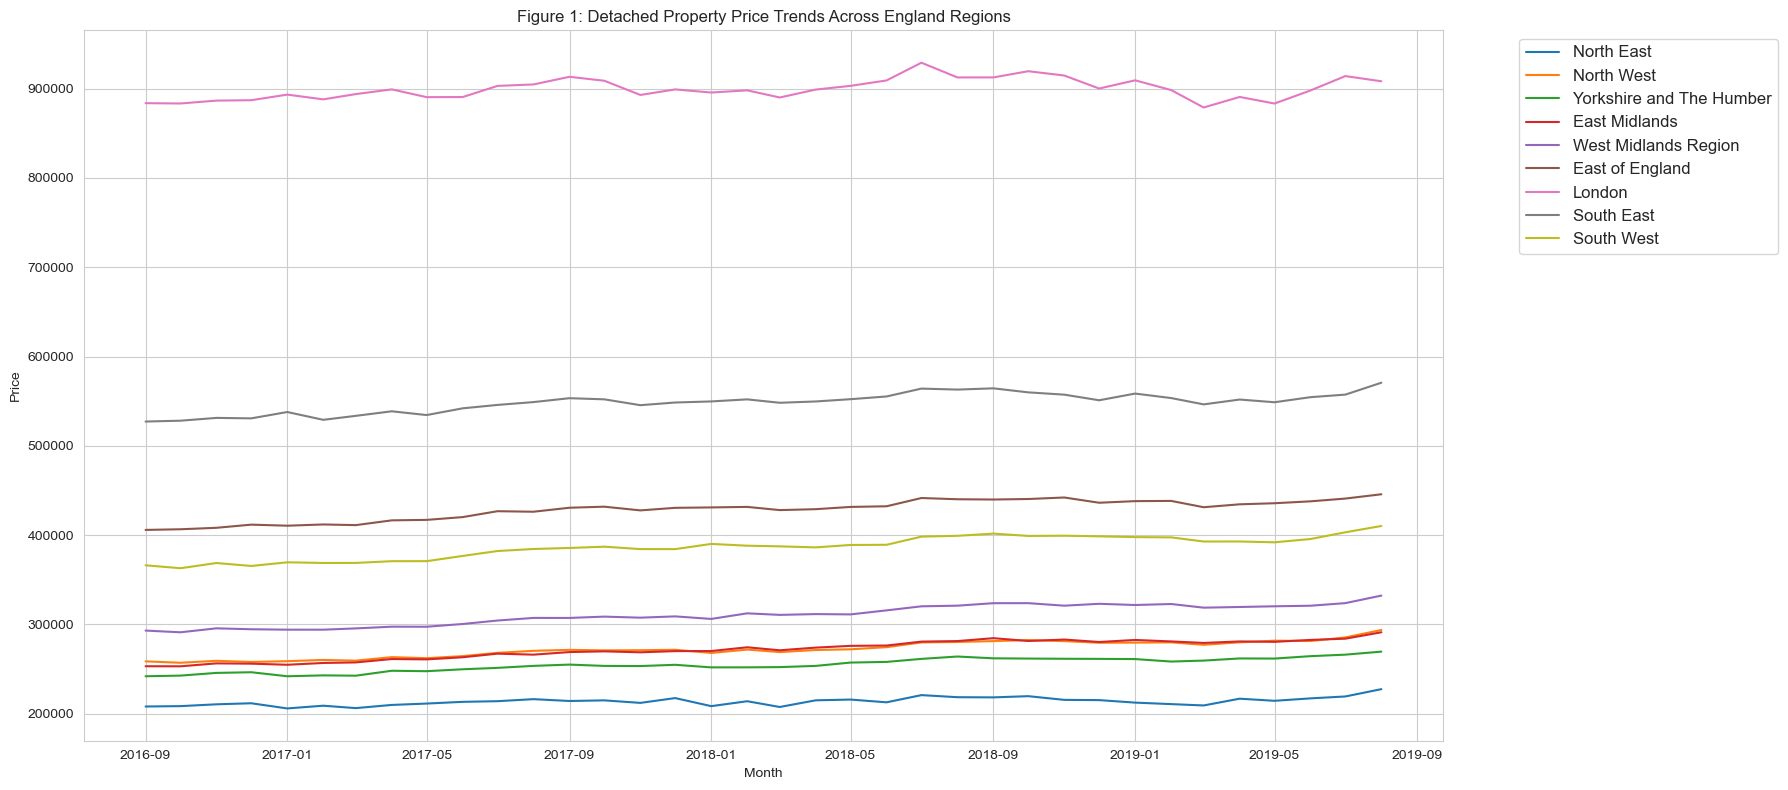

In [11]:
# set up the plot
plt.figure(figsize=(18, 8))
sns.set_style('whitegrid')

# plot trends for detached properties for each region
for region in regions['Area'].unique():
    region_data = regions[(regions['Area'] == region)]
    plt.plot(region_data['Month'], region_data['Detached'], label=region)

plt.title('Figure 1: Detached Property Price Trends Across England Regions')
plt.xlabel('Month')
plt.ylabel('Price')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='large')

plt.tight_layout()
plt.show()

The graph in Figure 1 provides an overview of how detached property prices have evolved across the nine regions of England over the observed 36-month period.

The graph clearly illustrates a substantial **regional disparity** in detached property prices. Regions in the South: South West, South East, London and East of England consistently exhibit higher average prices compared to regions in the North: North West, Yorkshire and The Humber, and North East. This disparity in the South aligns with the broader economic trends and demand for housing in these areas.

Visual examination reveals that the **London** region distinctly stands out. For instance, London region prices for detached properties are significantly higher than other regions: more than four times higher than the North East region, which is the least expensive region, and more than twice higher than the South West region or the East of England region, and almost twice higher than the South East region, which is the second most expensive region. Evidently, the consistently elevated detached property prices in London, underscoring its premium status in the realm of real estate, align seamlessly with its acknowledged reputation as a high-value property market. London prices exhibit noticeable variability, suggesting a more dynamic and potentially more volatile property market.

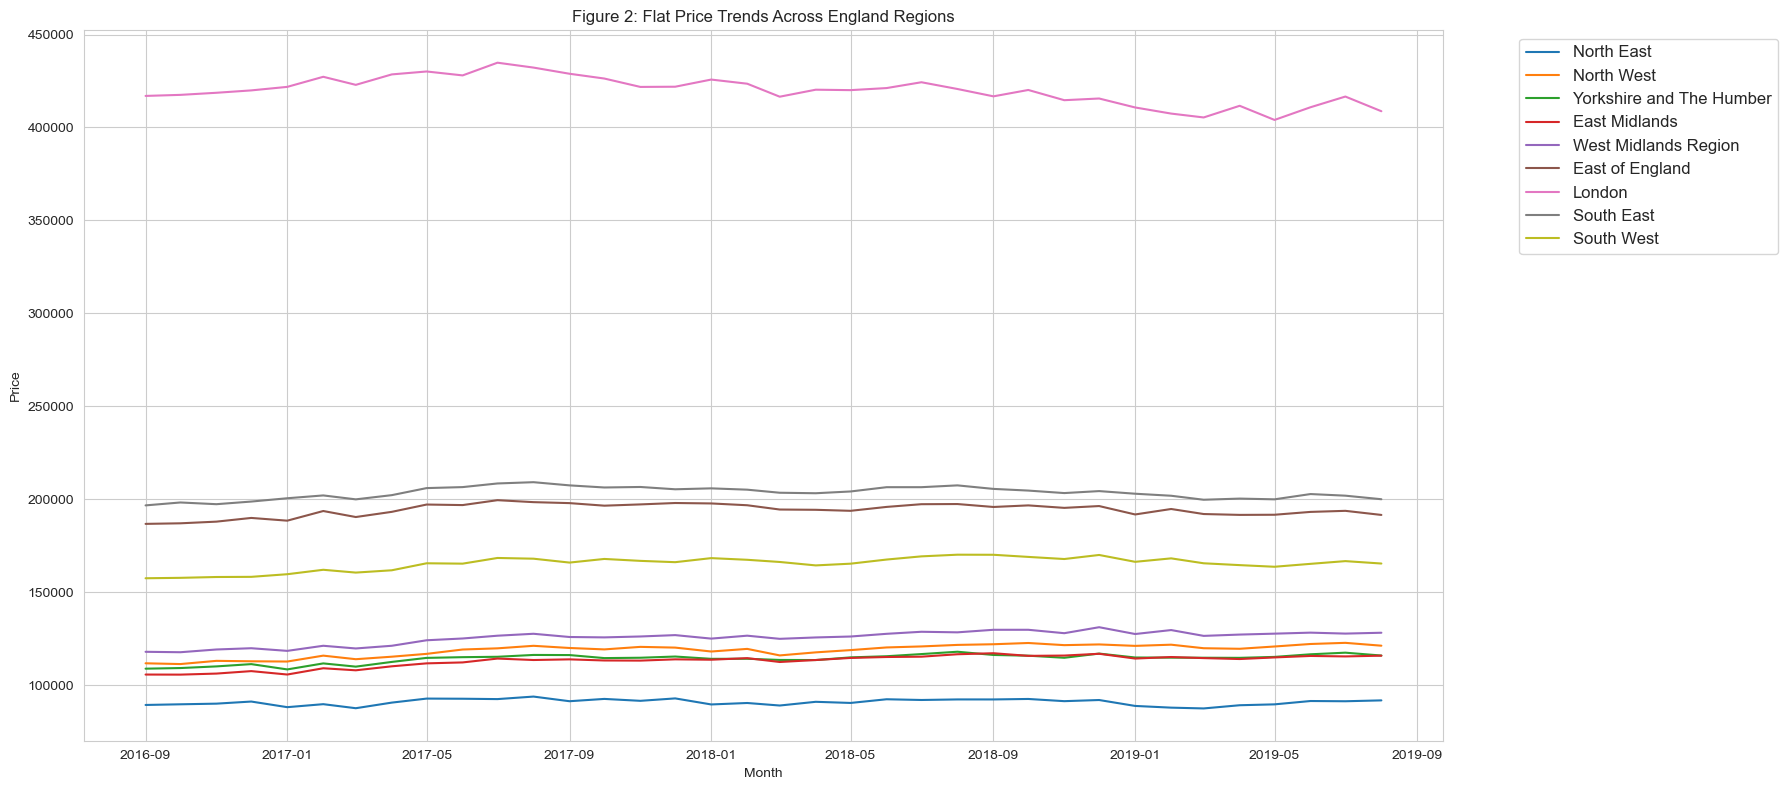

In [12]:
# set up the plot
plt.figure(figsize=(18, 8))
sns.set_style('whitegrid')

# plot trends for flat for each region
for region in regions['Area'].unique():
    region_data = regions[(regions['Area'] == region)]
    plt.plot(region_data['Month'], region_data['Flat'], label=region)

plt.title('Figure 2: Flat Price Trends Across England Regions')
plt.xlabel('Month')
plt.ylabel('Price')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='large')

plt.tight_layout()
plt.show()

The graph in Figure 2 presents a distinct profile for each region, showcasing the unique trajectory of flat prices over the observed 36-month period.

The graph displays a substantial **regional disparity** in flat prices. Regions in the South: South West, South East, London and East of England consistently exhibit higher average prices than other regions. The graph underscores the premium nature of real estate in these areas, 
 in the North: North West, Yorkshire and The Humber, and North East. This disparity in the South aligns with the broader economic trends and demand for housing in these areas.

Similarly to Figure 1, the graph in Figure 2 reveals that the **London** region distinctly stands out again, occupying a premium position with consistently higher flat prices than other regions. For instance, London region prices for flats are significantly higher than other regions: more than four times higher than the North East region, which is the least expensive region, and more than twice higher than the South East region, which is the second most expensive region. Similarly to the trend for detached property prices, London prices exhibit noticeable variability, suggesting a more dynamic and potentially volatile property market

Figures 1 and 2 show that London is characterised by the highest property prices, encompassing both detached and flat properties —additionally, the South East and East of England exhibit property prices above the average. Regions in the North, North East and North West generally have lower property prices but demonstrate consistent growth.

England's nine statistical regions can be categorised into three sub-national parts: the South (South West, South East, London, and East of England), the Midlands (West Midlands and East Midlands), and the North (North West, Yorkshire and The Humber, and North East). To gain a clearer understanding of trends and facilitate a more accessible and insightful observation of property market dynamics, we focus on each group: the North, the Midlands, The South (without London) and London, individually and present separate graphs for detached properties and flats. We look at London as a separate group as the London region exhibits highest property prices.

### Section 2.2 The North: North West, Yorkshire and The Humber, and North East Regions

The graph depicted in Figure 3 offers a comprehensive overview of the trajectory of detached property prices across the North sub-national part of England.

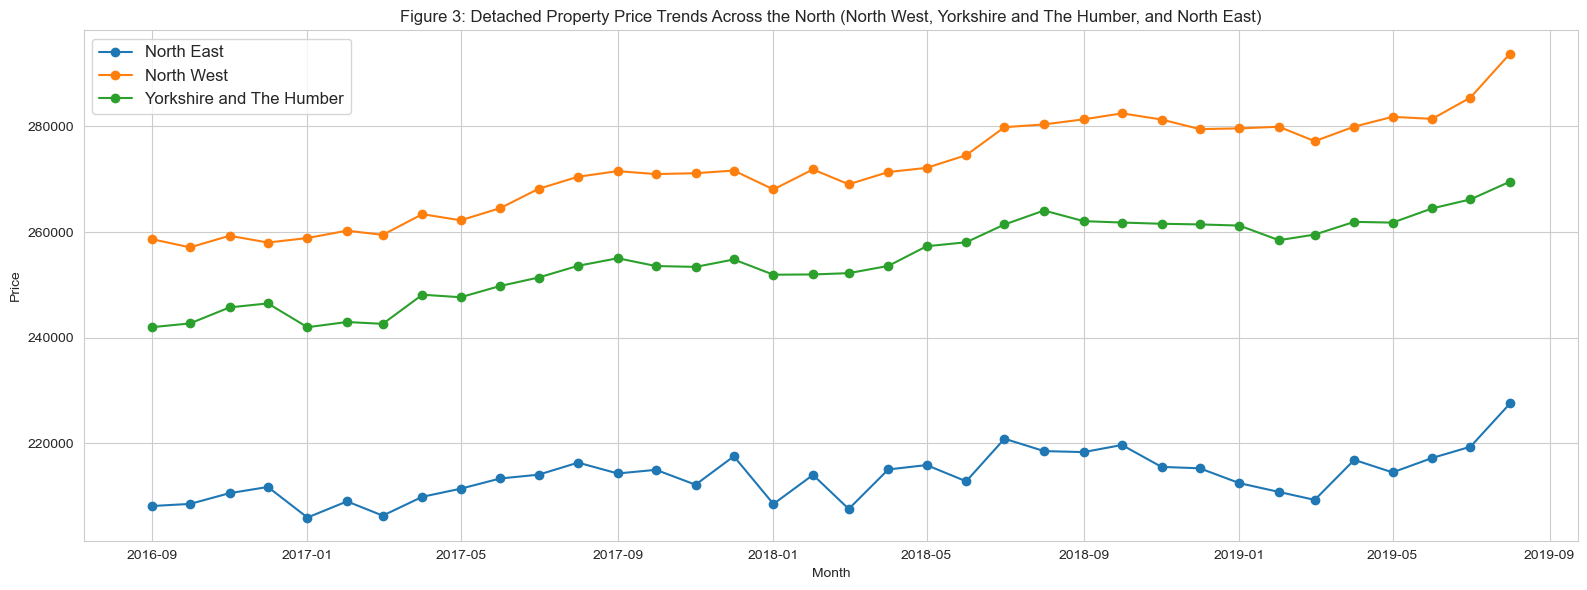

In [13]:
# the North sub-national part of England
the_north_regions = ['North East', 'North West', 'Yorkshire and The Humber']
the_north = regions[regions['Area'].isin(the_north_regions)]

# set up the plot
plt.figure(figsize=(16, 6))
sns.set_style('whitegrid')

# plot trends for detached properties for each region
for region in the_north_regions:
    region_data = the_north[(the_north['Area'] == region)]
    plt.plot(region_data['Month'], region_data['Detached'], marker='o', label=region)

plt.title('Figure 3: Detached Property Price Trends Across the North (North West, Yorkshire and The Humber, and North East)')
plt.xlabel('Month')
plt.ylabel('Price')
plt.legend(loc='upper left', fontsize='large')

plt.tight_layout()
plt.show()

From Figure 3, we can observe:

**North East** (blue line):
The overall trajectory of detached property prices in the North East region indicates an upward movement marked by gradual growth and occasional fluctuations. Seasonal patterns are noticeable, characterised by dips at the beginning of each year and peaks in mid to late summer.

**Yorkshire and The Humber** (green line):
There is an overall ascending trend in detached property prices in Yorkshire and the Humber region. A period of relatively stable prices, observed from mid-2017 to mid-2018, was marked by a plateau. While month-to-month variability is present, it remains moderate, with certain months exhibiting slightly more pronounced changes that contribute to the overall upward trend. There are no immediately noticeable seasonal patterns.

**North West** (orange line):
The prevailing trend is upward, characterised by fluctuations that signal positive growth. There is evident month-to-month variability, marked by fluctuations, indicating less prominent seasonal patterns with notable rising periods in the first half of each year.

Figure 4 illustrates the progression of flat prices across the North sub-national part of England.

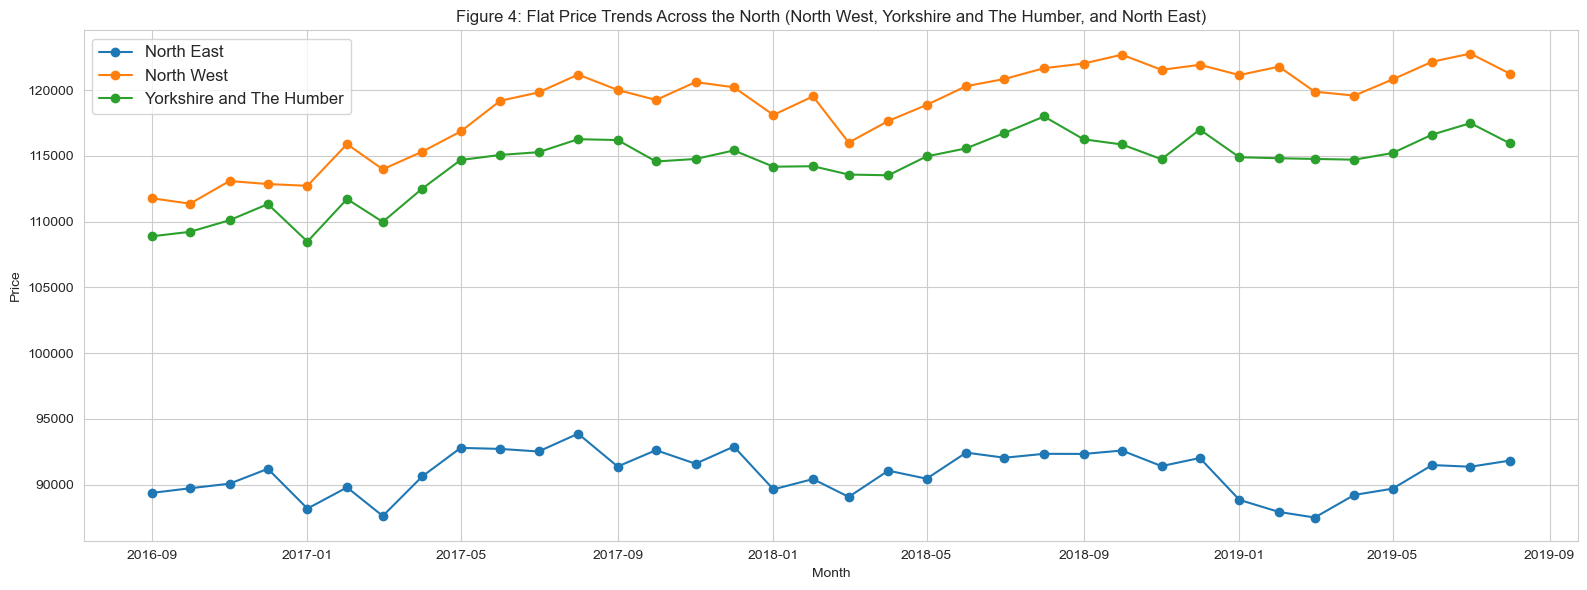

In [14]:
# set up the plot
plt.figure(figsize=(16, 6))
sns.set_style('whitegrid')

# plot trends for flat for each region
for region in the_north_regions:
    region_data = the_north[(the_north['Area'] == region)]
    plt.plot(region_data['Month'], region_data['Flat'], marker='o', label=region)

plt.title('Figure 4: Flat Price Trends Across the North (North West, Yorkshire and The Humber, and North East)')
plt.xlabel('Month')
plt.ylabel('Price')
plt.legend(loc='upper left', fontsize='large')

plt.tight_layout()
plt.show()

From Figure 4, we can observe:

**North East** (blue line):
Similarly to the upward trajectory seen in detached properties, flat prices in the North East region present a positive trend with some fluctuations. Seasonal patterns in flat prices closely align with those of detached properties, featuring potential dips at the beginning of each year and peaks in mid to late summer.

**Yorkshire and The Humber** (green line):
Similar to detached property prices, the flat prices in the Yorkshire and Humber region maintain a relatively stable positive trajectory with some month-to-month variability and no apparent seasonality.  

**North West** (orange line): 
Much like detached properties, month-to-month variability is evident, and the general trend remains positive for flat prices in the North West. Similar to detached properties, flat prices exhibit less prominent seasonal patterns with notable rising periods in the first half of each year. 

All three regions in the North display an overall positive trend in both detached property and flat prices over the observed period. August 2019 stands out as a notable period with higher property prices across all regions. Variability is present in each region, indicating the influence of factors leading to price fluctuations. Additionally, while the overall trends for detached property and flat prices align between the North West and Yorkshire and Humber, there are variations in the magnitude of price changes.

### Section 2.3 The Midlands: East Midlands and West Midlands Regions

Figure 5 presents a comprehensive overview of the trajectory of detached property prices in the Midlands sub-national part of England.

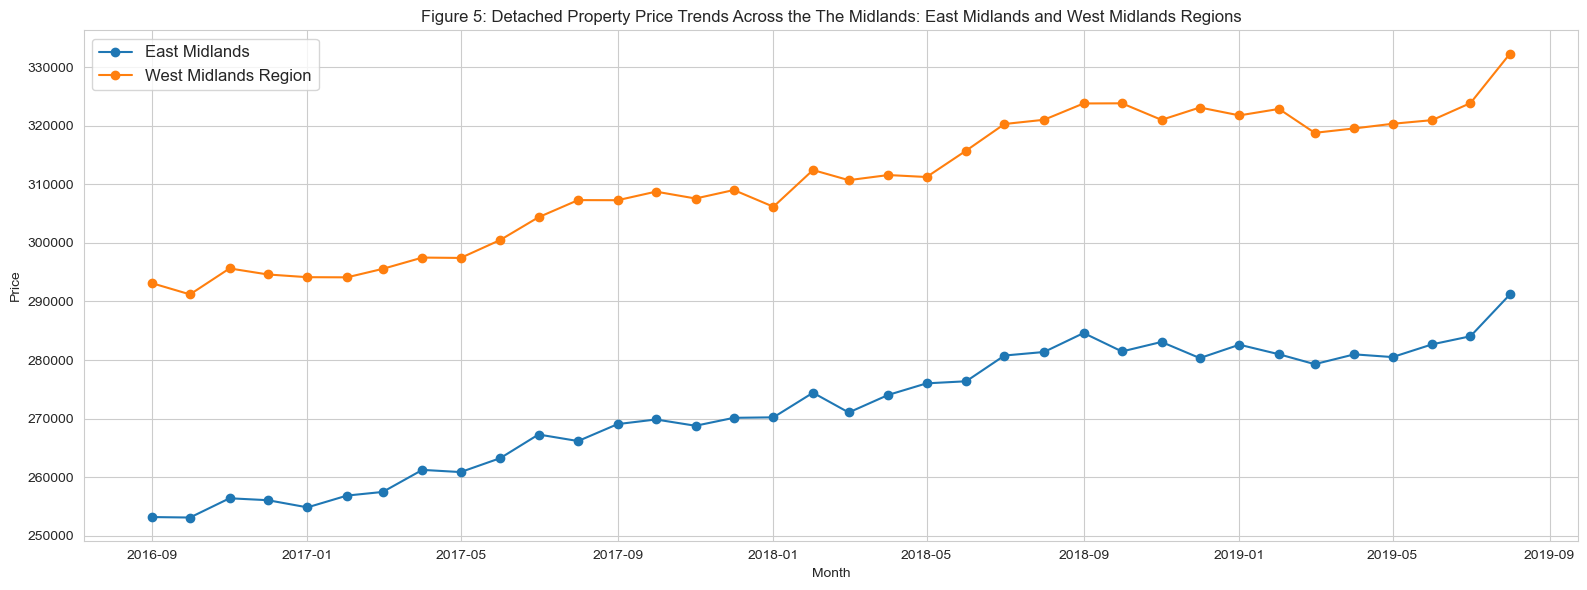

In [15]:
# the Midlands sub-national part of England
the_midlands_regions = ['East Midlands', 'West Midlands Region']
the_midlands = regions[regions['Area'].isin(the_midlands_regions)]

# set up the plot
plt.figure(figsize=(16, 6))
sns.set_style('whitegrid')

# plot trends for detached properties for each region
for region in the_midlands_regions:
    region_data = the_midlands[(the_midlands['Area'] == region)]
    plt.plot(region_data['Month'], region_data['Detached'], marker='o', label=region)

plt.title('Figure 5: Detached Property Price Trends Across the The Midlands: East Midlands and West Midlands Regions')
plt.xlabel('Month')
plt.ylabel('Price')
plt.legend(loc='upper left', fontsize='large')

plt.tight_layout()
plt.show()

From Figure 5, we can observe:

**East Midlands** (blue line):
Detached property prices in the East Midlands exhibit a consistent upward trend throughout the observed period. While dips are noticeable, the overall trajectory remains upward, and prices gradually ascend, with a distinct peak in August 2019. 

**West Midlands** (orange line):
In the West Midlands, detached property prices gradually increased over the observed period. Peaks in detached property prices are observed around mid-2018 and mid-2019. Slight dips occurred in late 2016 and mid-2017, followed by recovery and subsequent upward trends. Additionally, there are periods where prices stabilize, forming plateaus before the following upward movement.

The East and West Midlands exhibit an overall upward trend in detached property prices, indicating a positive market trend. While the overall trends align, there are variations in the magnitude of price changes between the East Midlands and West Midlands.

Figure 6 presents the unique trajectory of flat prices in the Midlands sub-national part of England.

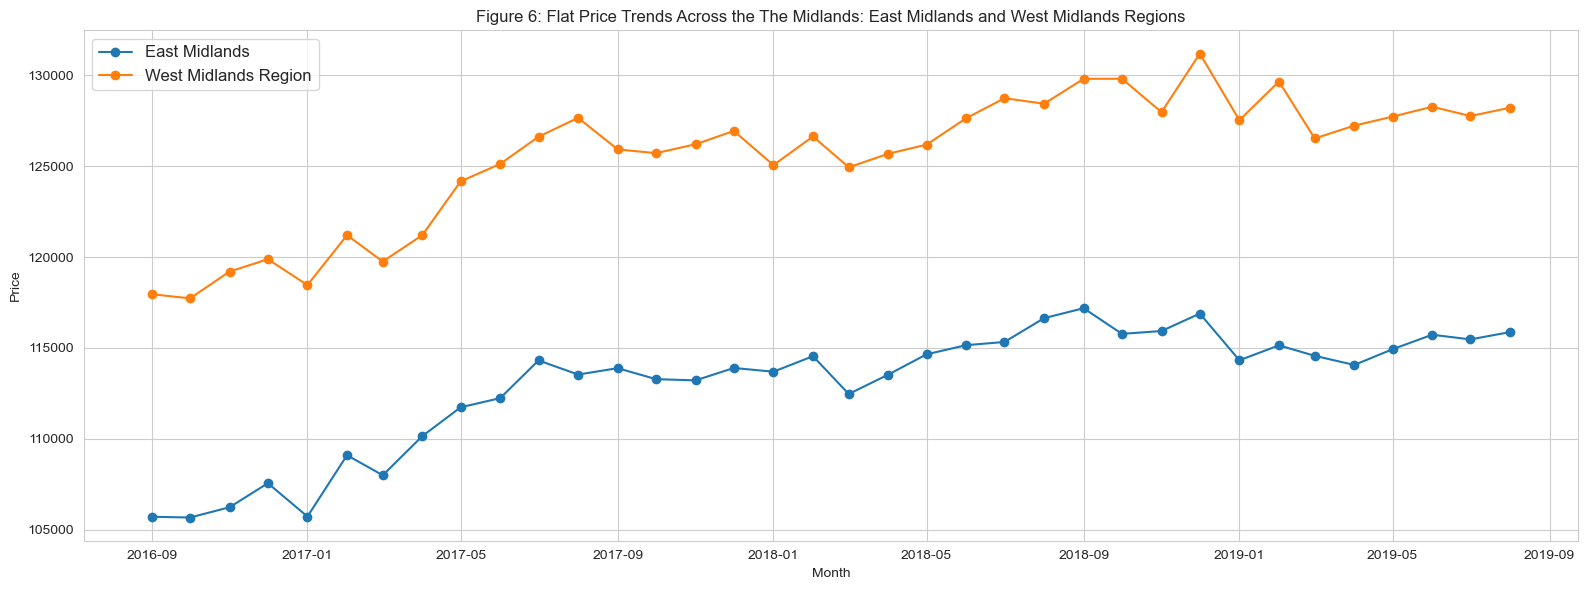

In [16]:
# set up the plot
plt.figure(figsize=(16, 6))
sns.set_style('whitegrid')

# plot trends for flat properties for each region
for region in the_midlands_regions:
    region_data = the_midlands[(the_midlands['Area'] == region)]
    plt.plot(region_data['Month'], region_data['Flat'], marker='o', label=region)

plt.title('Figure 6: Flat Price Trends Across the The Midlands: East Midlands and West Midlands Regions')
plt.xlabel('Month')
plt.ylabel('Price')
plt.legend(loc='upper left', fontsize='large')

plt.tight_layout()
plt.show()

From Figure 6, we can observe:

**East Midlands** (blue line):
Similar to detached properties, flat prices in the East Midlands demonstrated a consistent upward trend with occasional dips.

**West Midlands** (orange line):
Like detached properties, flat prices in the West Midlands showcase a general upward trend., mirroring the positive direction observed in detached properties. Similar to detached properties, dips are noticed in particular months, followed by a recovery.

Both regions exhibit comparable overall trends and seasonal patterns, implying that common factors may influence property markets in these areas. There appears to be a correlation in the peaks and dips between the two regions, suggesting a potential synchronisation in the regional housing markets of the Midlands.

### Section 2.4 The South: East of England, South East, South West without London

Figure 7 illustrates the progression of detached property prices across the South sub-national part of England without London

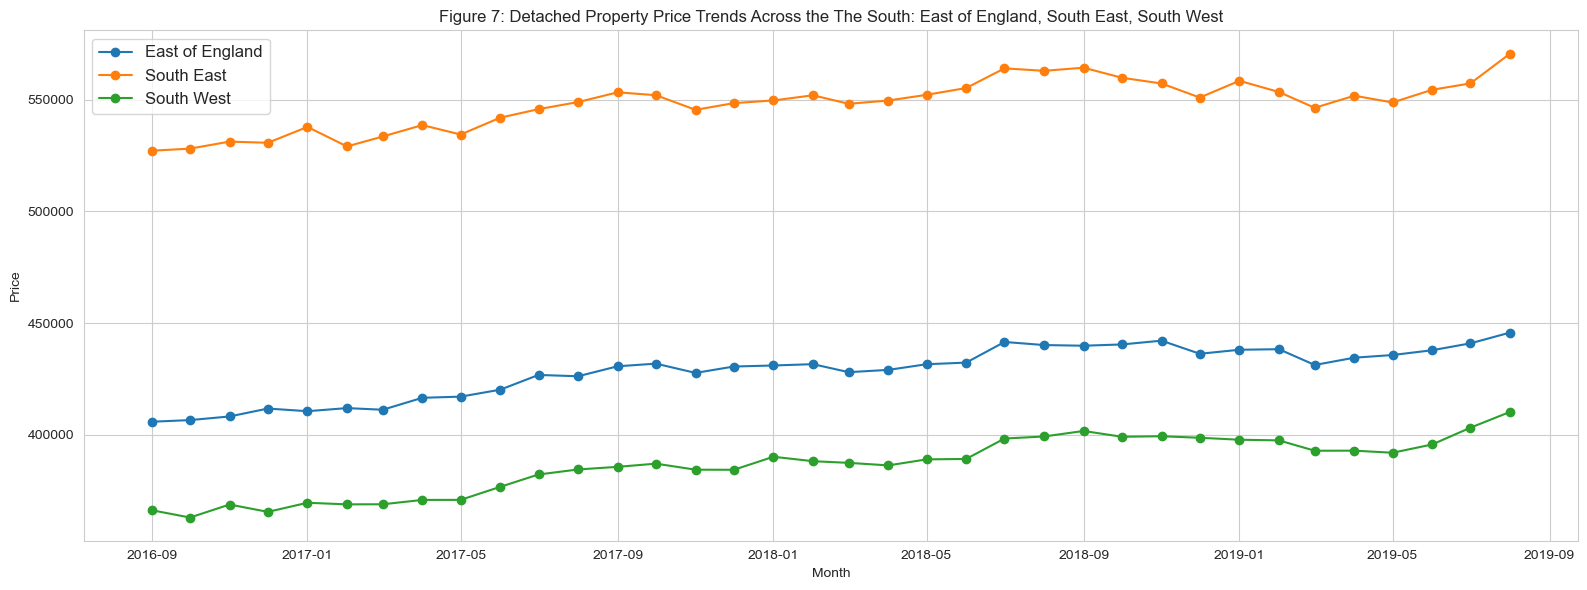

In [17]:
# the Midlands sub-national part of England
the_south_regions = ['East of England', 'South East', 'South West']
the_south = regions[regions['Area'].isin(the_south_regions)]
# set up the plot
plt.figure(figsize=(16, 6))
sns.set_style('whitegrid')

# plot trends for detached properties for each region
for region in the_south_regions:
    region_data = the_south[(the_south['Area'] == region)]
    plt.plot(region_data['Month'], region_data['Detached'], marker='o', label=region)

plt.title('Figure 7: Detached Property Price Trends Across the The South: East of England, South East, South West')
plt.xlabel('Month')
plt.ylabel('Price')
plt.legend(loc='upper left', fontsize='large')

plt.tight_layout()
plt.show()

From Figure 7, we can observe:

**South West** (green line):
Detached property prices in the South West exhibit a general upward trend. A noticeable seasonal pattern is observed, with peaks occurring in the summer (June to August) and dips in the winter (December to February).

**East of England** (blue line):
The East of England demonstrates a consistent upward trend in detached property prices. Seasonal patterns are evident, showcasing regular fluctuations throughout the years: a minor price dip during the winter months (November to February) and a peak in the summer months (June to August).

**South East** (orange line):
Detached properties in the South East exhibit a gradual price increase with observable seasonal patterns. Prices generally peak around mid-year and experience dips towards the end and beginning of each year.

The graph in Figure 8 showcases the unique trajectory of flat prices flat prices across the South sub-national part of England without London.

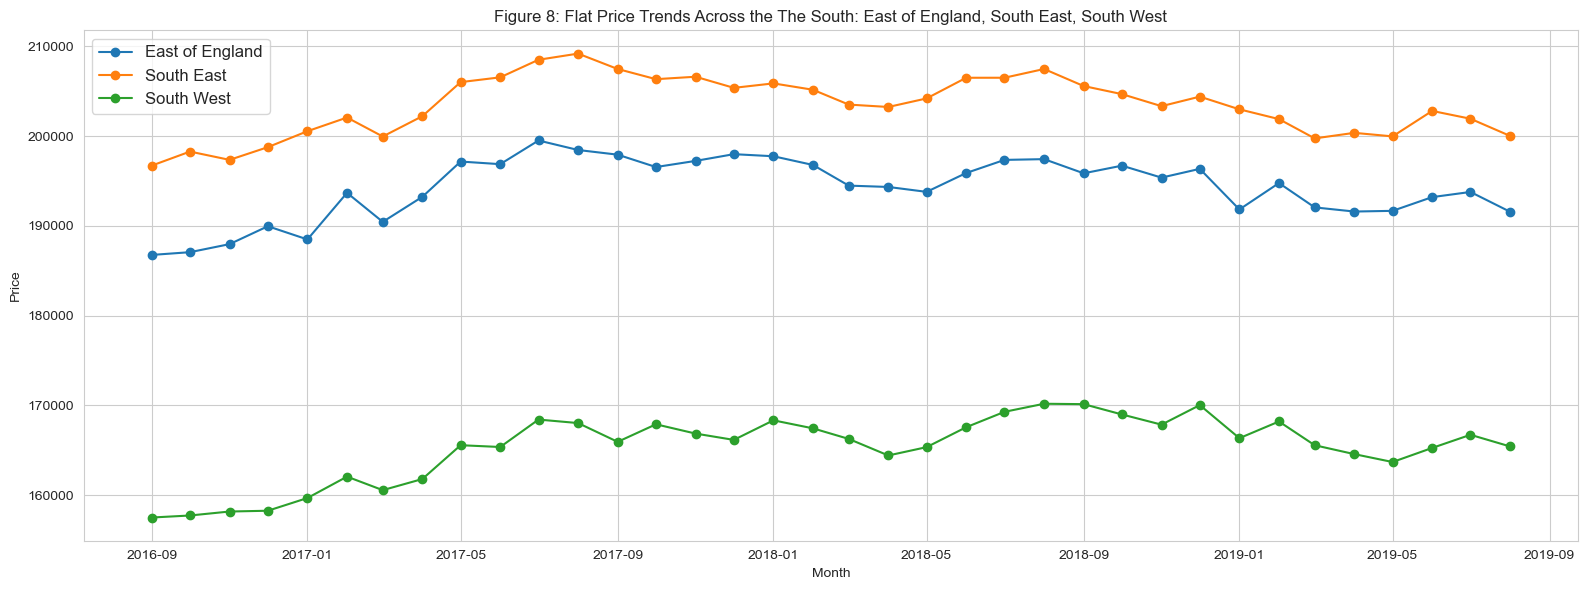

In [18]:
# set up the plot
plt.figure(figsize=(16, 6))
sns.set_style('whitegrid')

# plot trends for flat properties for each region
for region in the_south_regions:
    region_data = the_south[(the_south['Area'] == region)]
    plt.plot(region_data['Month'], region_data['Flat'], marker='o', label=region)

plt.title('Figure 8: Flat Price Trends Across the The South: East of England, South East, South West')
plt.xlabel('Month')
plt.ylabel('Price')
plt.legend(loc='upper left', fontsize='large')

plt.tight_layout()
plt.show()

From Figure 8, we can observe:

**South West** (green line):
Flat prices in the South West also demonstrate an overall increasing trend. Similar to detached properties, flat prices exhibit a seasonal pattern with peaks in the summer months and dips in the winter months. This pattern aligns with the overall property market trend but with slightly less variability compared to detached properties. Consistently observed peak prices in the summer, particularly in August, and dips occurring in the winter months, with December 2016 being the lowest point, are notable. As with detached properties, there are no distinct plateaus in flat prices, indicating a continuous upward trend.

**East of England** (blue line):
Flat prices in the East of England exhibit a consistent upward trend. Similar to detached properties, flat prices display seasonality, with a slight dip in prices during the winter months and a peak during the summer months.

**South East** (orange line):
Like detached properties, flat prices in the South East exhibit an overall increasing trend. Seasonal patterns for flat properties also tend to peak around mid-year and experience dips in the earlier months of each year.

All three regions exhibit a similar seasonal pattern, indicating a potential influence of external factors that affect property prices. While the overall trends align and suggest a potential synchronisation in the regional housing markets of the South, there are variations in the magnitude of price changes between the South East, South West and East of England.
Additionally, the positive in detached property and flat prices suggests economic resilience and positive sentiment in the real estate markets of these regions.

### Section 2.5 London

Figure 9 and Figure 10 present the unique trajectory of detached property and flat prices, respectively, in the London region.

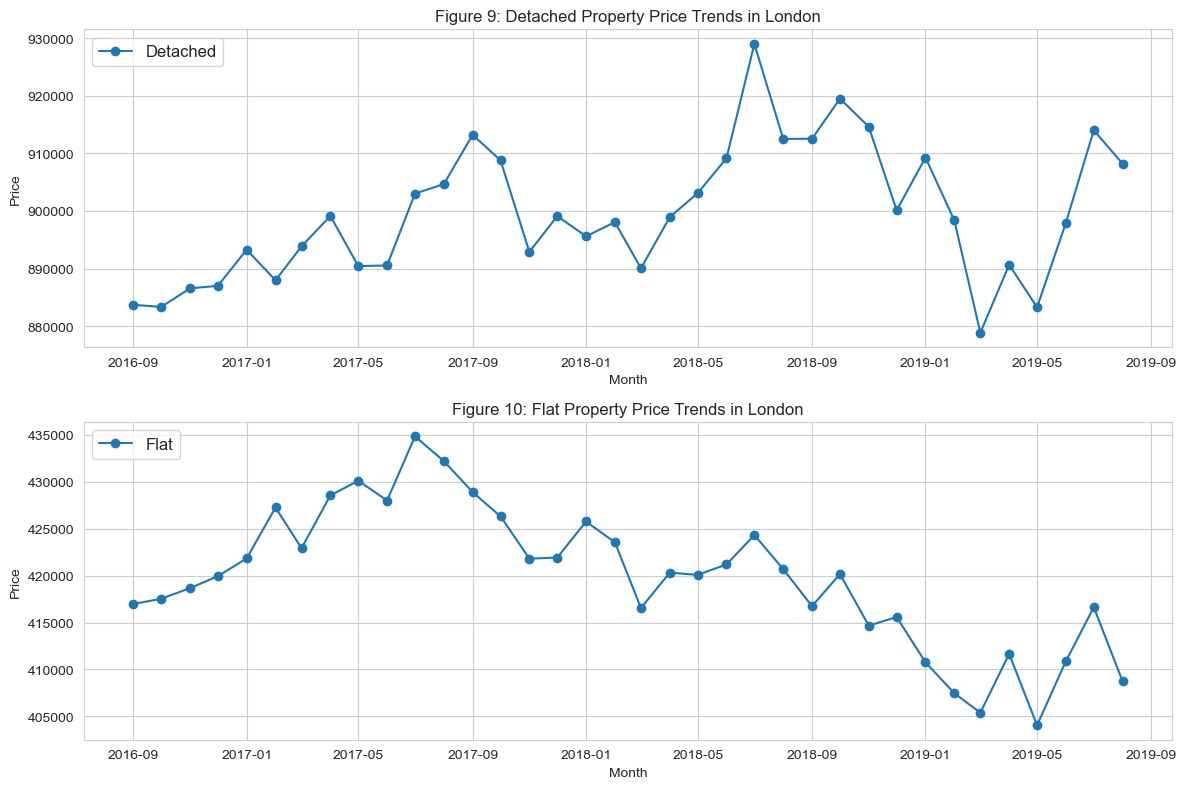

In [19]:
# data for London
london_data = regions[regions['Area'] == 'London']

# set up the plots
plt.figure(figsize=(12, 8))
sns.set_style('whitegrid')

# plot detached property prices
plt.subplot(2, 1, 1)
plt.plot(london_data['Month'], london_data['Detached'], label='Detached', marker='o')
plt.xlabel('Month')
plt.ylabel('Price')
plt.title('Figure 9: Detached Property Price Trends in London')
plt.legend(loc='upper left', fontsize='large')

# plot flat prices
plt.subplot(2, 1, 2)
plt.plot(london_data['Month'], london_data['Flat'], label='Flat', marker='o')
plt.xlabel('Month')
plt.ylabel('Price')
plt.title('Figure 10: Flat Property Price Trends in London')
plt.legend(loc='upper left', fontsize='large')

plt.tight_layout()
plt.show()

From Figure 9, we can observe:

The average prices for detached properties in London region exhibit a gradual increase. A noticeable pattern is evident, with peaks occurring approximately every 12 months. These peaks are particularly prominent around mid-year. Dips in prices are consistently observed around the beginning of each year. Monthly variability is apparent, showcasing price fluctuations from one month to the next, and is more pronounced during the mid-year peaks.

From Figure 10, we can observe:

The flat prices in London show a consistent upward trend. Similar to detached properties, flat prices display a recurring pattern of peaks and dips. Peaks are notably observed around mid-year, while dips consistently occur in the early months of each year. Much like detached properties, flat properties lack distinct plateaus, reflecting an overall trend of continuous upward movement.

### Section 2.6 Conclusion on Trends

Across all nine regions, there is a general upward trend in property prices. London consistently shows the highest property prices, with South East and East of England following. The property market in South East and East of England shows resilience with consistent price growth.

London property market appears to be more volatile than other regions, but overall, it maintains high average prices, possibly due to its well-known premium property market status,

There is a regional disparity. Properties in the South tend to be significantly more expensive than properties in the Midlands or the North. Possibly, economic factors such as economic growth and the employment market can significantly influence property prices within regions. Additionally, properties within the same sub-national part tend to have aligning trends but with variations in magnitude.

Detached properties tend to have higher prices compared to flats across all regions, while flats tend to have a more stable pricing trend compared to detached properties.

## Section 3 Price Changes

In this section we analyse how flat prices have changed for each area between July 2017 and July 2018.

### Section 3.1 Data Preparation

For the purpose of our analysis we need to calculate the change in price of flats in each area between July 2017 and July 2018.

In [20]:
# filter the data for July 2017 and July 2018
flat_2017 = areas[areas['Month'] == '2017-07-01'][['Area', 'Flat', 'Region']]
flat_2018 = areas[areas['Month'] == '2018-07-01'][['Area', 'Flat', 'Region']]

# rename the Flat column to Flat2017 and Flat2018
flat_2017.rename(columns={'Flat': 'Flat2017'}, inplace=True)
flat_2018.rename(columns={'Flat': 'Flat2018'}, inplace=True)

# merge the two data frames on Area and Region
df_price_change = pd.merge(flat_2017, flat_2018, on=['Area', 'Region'])

# calculate the change in flat prices between July 2017 and July 2018
df_price_change['PriceChange'] = df_price_change['Flat2018'] - df_price_change['Flat2017']

# calculate the percentage change
df_price_change['PercentChange'] = (df_price_change['PriceChange'] / df_price_change['Flat2017']) * 100

# drop the Flat2017 and Flat2018
df_price_change = df_price_change.drop(['Flat2017', 'Flat2018'], axis=1)

### Section 3.2 The North: North West, Yorkshire and The Humber, and North East Regions

Figure 11 depicts a horizontal bar plot illustrating the change in flat prices across various areas within the **North West** region during the period from July 2017 to July 2018, providing a quantitative measure of the price fluctuations and displays the mean, the median and the standard variation providing additional insights into the distribution of the data.

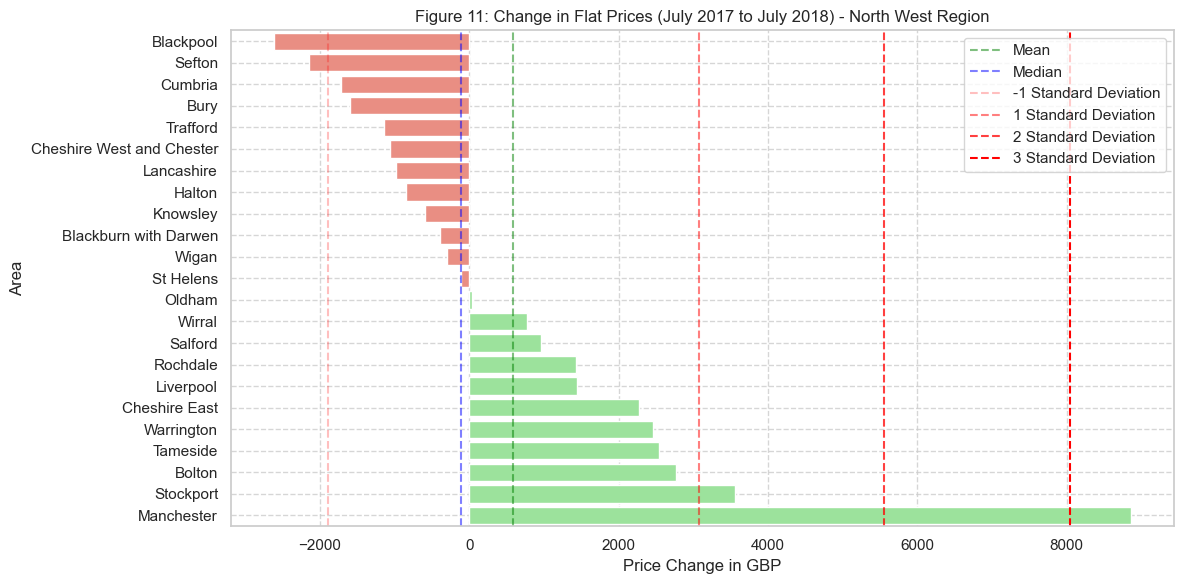

In [21]:
# filter for a specific region
NW_df = df_price_change[df_price_change['Region'] == 'North West']
# sort by PriceChange in ascending order
NW_df = NW_df.sort_values(by='PriceChange', ascending=True)

sns.set(style="whitegrid")

# create a copy to avoid SettingWithCopyWarning
NW_df = NW_df.copy()

# determine colors based on positive and negative changes
NW_df['Colour'] = ['salmon' if change <= 0 else 'lightgreen' for change in NW_df['PercentChange']]

# plot the change in price
plt.figure(figsize=(12, 6))
sns.barplot(x='PriceChange', y='Area', data=NW_df, palette=NW_df['Colour'])
plt.axvline(x=NW_df['PriceChange'].mean(), color='green', linestyle='--', alpha=0.5, label='Mean')
plt.axvline(x=NW_df['PriceChange'].median(), color='blue', linestyle='--', alpha=0.5, label='Median')
plt.axvline(x=NW_df['PriceChange'].mean() - NW_df['PriceChange'].std(), color='red', linestyle='--', alpha=0.25, label='-1 Standard Deviation')
plt.axvline(x=NW_df['PriceChange'].mean() + NW_df['PriceChange'].std(), color='red', linestyle='--', alpha=0.5, label='1 Standard Deviation')
plt.axvline(x=NW_df['PriceChange'].mean() + 2*NW_df['PriceChange'].std(), color='red', linestyle='--', alpha=0.75, label='2 Standard Deviation')
plt.axvline(x=NW_df['PriceChange'].mean() + 3*NW_df['PriceChange'].std(), color='red', linestyle='--', alpha=1, label='3 Standard Deviation')
plt.xlabel('Price Change in GBP')
plt.ylabel('Area')
plt.grid(True, linestyle='--', alpha=0.8)
plt.title('Figure 11: Change in Flat Prices (July 2017 to July 2018) - North West Region')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

From Figure 11, we can observe:

The areas Blackpool, Sefton and Cumbria display the most prominent negative changes in flat prices. This suggests a general trend of declining flat prices in these areas during the period from July 2017 to July 2018.

The areas St Helens and Oldham display a negative and a positive price change, respectively.  While the magnitude is not as pronounced as in other areas within the North West region, the change might indicate resilience and stability in the flat property market.

The areas Manchester, Stockport, Bolton, Tameside and Warrington display the most significant changes. This suggests a general trend of increasing flat prices in these areas. Manchester significantly stands out as an outlier with a value of more than three times the standard deviation away from the mean, suggesting unique factors for price growth.

Figure 12 depicts a horizontal bar plot illustrating the change in flat prices across various areas within the **Yorkshire and The Humber** region during the period from July 2017 to July 2018, providing a quantitative measure of the price fluctuations and displays the mean, the median and the standard variation providing additional insights into the distribution of the data.

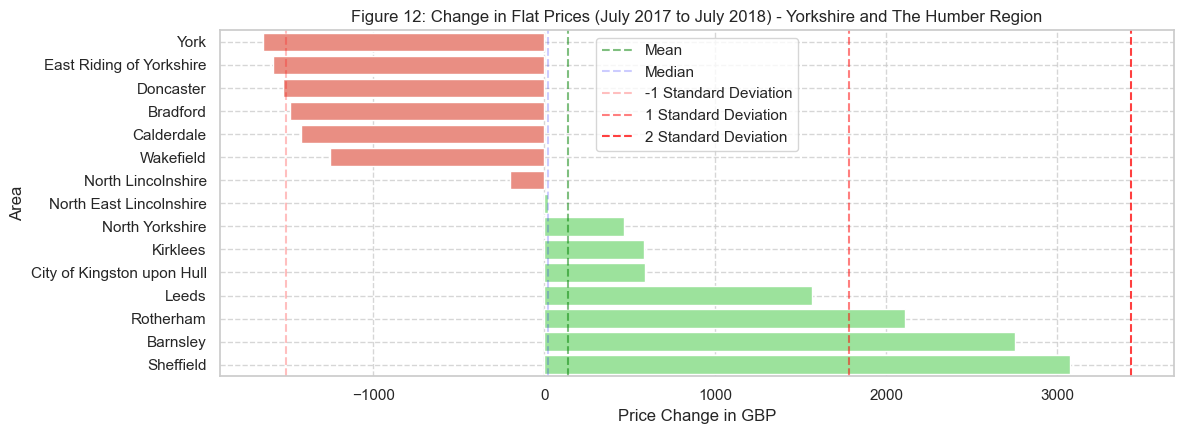

In [22]:
# filter for a specific region
Y_df = df_price_change[df_price_change['Region'] == 'Yorkshire and The Humber']
# Sort by PriceChange in ascending order
Y_df = Y_df.sort_values(by='PriceChange', ascending=True)

sns.set(style="whitegrid")

# create a copy to avoid SettingWithCopyWarning
Y_df = Y_df.copy()

# determine colors based on positive and negative changes
Y_df['Colour'] = ['salmon' if change <= 0 else 'lightgreen' for change in Y_df['PercentChange']]

# plot the change in price
plt.figure(figsize=(12, 4.5))
sns.barplot(x='PriceChange', y='Area', data=Y_df, palette=Y_df['Colour'])
plt.axvline(x=Y_df['PriceChange'].mean(), color='green', linestyle='--', alpha=0.5, label='Mean')
plt.axvline(x=Y_df['PriceChange'].median(), color='blue', linestyle='--', alpha=0.2, label='Median')
plt.axvline(x=Y_df['PriceChange'].mean()- Y_df['PriceChange'].std(), color='red', linestyle='--', alpha=0.25, label='-1 Standard Deviation')
plt.axvline(x=Y_df['PriceChange'].mean()+ Y_df['PriceChange'].std(), color='red', linestyle='--', alpha=0.5, label='1 Standard Deviation')
plt.axvline(x=Y_df['PriceChange'].mean() + 2*Y_df['PriceChange'].std(), color='red', linestyle='--', alpha=0.75, label='2 Standard Deviation')
plt.xlabel('Price Change in GBP')
plt.ylabel('Area')
plt.grid(True, linestyle='--', alpha=0.8)
plt.title('Figure 12: Change in Flat Prices (July 2017 to July 2018) - Yorkshire and The Humber Region')
plt.legend()
plt.tight_layout()
plt.show()

From Figure 12, we can observe:

The areas of York, East Riding of Yorkshire, Doncaster, Bradford, Calderdale, and Wakefield exhibit significant negative changes in flat prices. This indicates a general trend of declining flat prices in these areas during the period from July 2017 to July 2018.

While North East Lincolnshire presents the least significant change visibly coinciding with the median, this could indicate resilience and stability.

Sheffield, Barnsley, Rotherham and Leeds display prominent positive changes in flat prices, suggesting growth or improvement. Sheffield exhibits the most significant change in flat prices for this region with a value of almost twice the standard deviation away from the mean, suggesting unique factors for such rapid growth.

Figure 13 depicts a horizontal bar plot illustrating the change in flat prices across various areas within the **North East** region during the period from July 2017 to July 2018, providing a quantitative measure of the price fluctuations and displays the mean, the median and the standard variation providing additional insights into the distribution of the data.

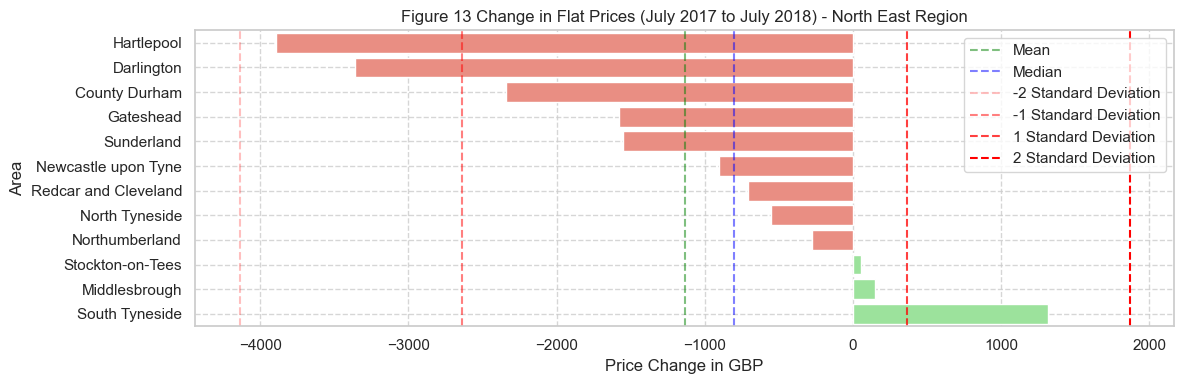

In [23]:
# filter for a specific region
NE_df = df_price_change[df_price_change['Region'] == 'North East']
# Sort by PriceChange in ascending order
NE_df = NE_df.sort_values(by='PriceChange', ascending=True)

sns.set(style="whitegrid")

# create a copy to avoid SettingWithCopyWarning
NE_df = NE_df.copy()

# determine colors based on positive and negative changes
NE_df['Colour'] = ['salmon' if change <= 0 else 'lightgreen' for change in NE_df['PercentChange']]

# plot the change in price
plt.figure(figsize=(12, 4))
sns.barplot(x='PriceChange', y='Area', data=NE_df, palette=NE_df['Colour'])
plt.axvline(x=NE_df['PriceChange'].mean(), color='green', linestyle='--', alpha=0.5, label='Mean')
plt.axvline(x=NE_df['PriceChange'].median(), color='blue', linestyle='--', alpha=0.5, label='Median')
plt.axvline(x=NE_df['PriceChange'].mean() - 2*NE_df['PriceChange'].std(), color='red', linestyle='--', alpha=0.25, label='-2 Standard Deviation')
plt.axvline(x=NE_df['PriceChange'].mean() - NE_df['PriceChange'].std(), color='red', linestyle='--', alpha=0.5, label='-1 Standard Deviation')
plt.axvline(x=NE_df['PriceChange'].mean() + NE_df['PriceChange'].std(), color='red', linestyle='--', alpha=0.75, label='1 Standard Deviation')
plt.axvline(x=NE_df['PriceChange'].mean() + 2*NE_df['PriceChange'].std(), color='red', linestyle='--', alpha=1, label='2 Standard Deviation')
plt.xlabel('Price Change in GBP')
plt.ylabel('Area')
plt.grid(True, linestyle='--', alpha=0.8)
plt.title('Figure 13 Change in Flat Prices (July 2017 to July 2018) - North East Region')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

From Figure 13, we can observe:

The majority of the areas in the North East region display negative changes in flat prices, indicating a prevailing trend of declining flat prices in these areas during the period from July 2017 to July 2018. Hartlepool and Darlington presented the most prominent negative changes, suggesting severe declines in flat prices compared to other areas from the same region.

While Stockton-on-Tees presents the least significant change, this could indicate resilience and stability.

The exceptional growth observed in South Tyneside sets the area as an outlier and indicates a unique and potentially rapid growth in this area.

### Section 3.3 The Midlands: East Midlands and West Midlands Regions

Figure 14 depicts a horizontal bar plot illustrating the change in flat prices across various areas within the **East Midlands** region during the period from July 2017 to July 2018, providing a quantitative measure of the price fluctuations and displays the mean, the median and the standard variation providing additional insights into the distribution of the data.

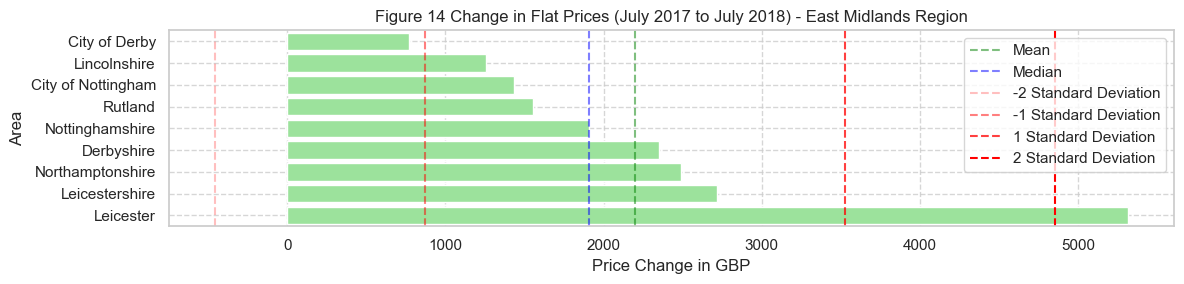

In [24]:
# filter for a specific region
EM_df = df_price_change[df_price_change['Region'] == 'East Midlands']
# Sort by PriceChange in ascending order
EM_df = EM_df.sort_values(by='PriceChange', ascending=True)

sns.set(style="whitegrid")

# create a copy to avoid SettingWithCopyWarning
EM_df = EM_df.copy()

# determine colors based on positive and negative changes
EM_df['Colour'] = ['salmon' if change <= 0 else 'lightgreen' for change in EM_df['PercentChange']]

# plot the change in price
plt.figure(figsize=(12, 3))
sns.barplot(x='PriceChange', y='Area', data=EM_df, palette=EM_df['Colour'])
plt.axvline(x=EM_df['PriceChange'].mean(), color='green', linestyle='--', alpha=0.5, label='Mean')
plt.axvline(x=EM_df['PriceChange'].median(), color='blue', linestyle='--', alpha=0.5, label='Median')
plt.axvline(x=EM_df['PriceChange'].mean() - 2*EM_df['PriceChange'].std(), color='red', linestyle='--', alpha=0.25, label='-2 Standard Deviation')
plt.axvline(x=EM_df['PriceChange'].mean() - EM_df['PriceChange'].std(), color='red', linestyle='--', alpha=0.5, label='-1 Standard Deviation')
plt.axvline(x=EM_df['PriceChange'].mean() + EM_df['PriceChange'].std(), color='red', linestyle='--', alpha=0.75, label='1 Standard Deviation')
plt.axvline(x=EM_df['PriceChange'].mean() + 2*EM_df['PriceChange'].std(), color='red', linestyle='--', alpha=1, label='2 Standard Deviation')
plt.xlabel('Price Change in GBP')
plt.ylabel('Area')
plt.grid(True, linestyle='--', alpha=0.8)
plt.title('Figure 14 Change in Flat Prices (July 2017 to July 2018) - East Midlands Region')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

From Figure 14, we can observe:

All areas in East Midlands exhibit positive changes in flat prices for the period from July 2017 to July 2018, indicating a general trend of growth.

Leicester stands out as an outlier with an exceptionally high positive change in flat prices, potentially indicating a unique and potentially rapid growth.

Figure 15 depicts a horizontal bar plot illustrating the change in flat prices across various areas within the **West Midlands** region during the period from July 2017 to July 2018, providing a quantitative measure of the price fluctuations and displays the mean, the median and the standard variation providing additional insights into the distribution of the data.

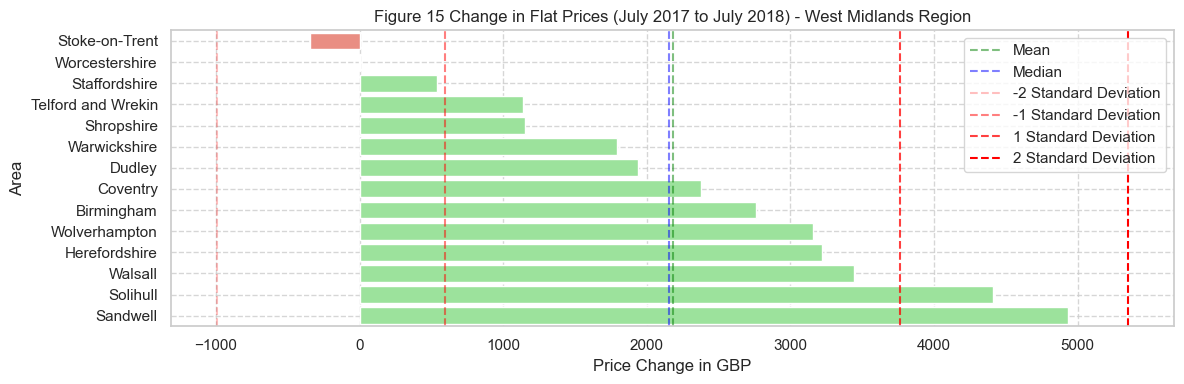

In [25]:
# filter for a specific region
WM_df = df_price_change[df_price_change['Region'] == 'West Midlands']
# Sort by PriceChange in ascending order
WM_df = WM_df.sort_values(by='PriceChange', ascending=True)

sns.set(style="whitegrid")

# create a copy to avoid SettingWithCopyWarning
WM_df = WM_df.copy()

# determine colors based on positive and negative changes
WM_df['Colour'] = ['salmon' if change <= 0 else 'lightgreen' for change in WM_df['PercentChange']]

# plot the change in price
plt.figure(figsize=(12, 4))
sns.barplot(x='PriceChange', y='Area', data=WM_df, palette=WM_df['Colour'])
plt.axvline(x=WM_df['PriceChange'].mean(), color='green', linestyle='--', alpha=0.5, label='Mean')
plt.axvline(x=WM_df['PriceChange'].median(), color='blue', linestyle='--', alpha=0.5, label='Median')
plt.axvline(x=WM_df['PriceChange'].mean() - 2*WM_df['PriceChange'].std(), color='red', linestyle='--', alpha=0.25, label='-2 Standard Deviation')
plt.axvline(x=WM_df['PriceChange'].mean() - WM_df['PriceChange'].std(), color='red', linestyle='--', alpha=0.5, label='-1 Standard Deviation')
plt.axvline(x=WM_df['PriceChange'].mean() + WM_df['PriceChange'].std(), color='red', linestyle='--', alpha=0.75, label='1 Standard Deviation')
plt.axvline(x=WM_df['PriceChange'].mean() + 2*WM_df['PriceChange'].std(), color='red', linestyle='--', alpha=1, label='2 Standard Deviation')
plt.xlabel('Price Change in GBP')
plt.ylabel('Area')
plt.grid(True, linestyle='--', alpha=0.8)
plt.title('Figure 15 Change in Flat Prices (July 2017 to July 2018) - West Midlands Region')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

From Figure 15, we can observe:

Almost all areas in the West Midlands exhibit positive changes in flat prices. While Worcestershire presents the least significant change visibly around zero, this could indicate resilience and stability.
Solihull and Sandwell stand out prominently as outliers with exceptionally high positive changes in flat prices, with values of more than one standard deviation away from the mean, potentially indicating a unique and potentially rapid growth in these areas. 

### Section 3.4 The South: East of England, South East, South West, London

Figure 16 depicts a horizontal bar plot illustrating the change in flat prices across various areas within the **East Of England** region during the period from July 2017 to July 2018, providing a quantitative measure of the price fluctuations and displays the mean, the median and the standard variation providing additional insights into the distribution of the data.

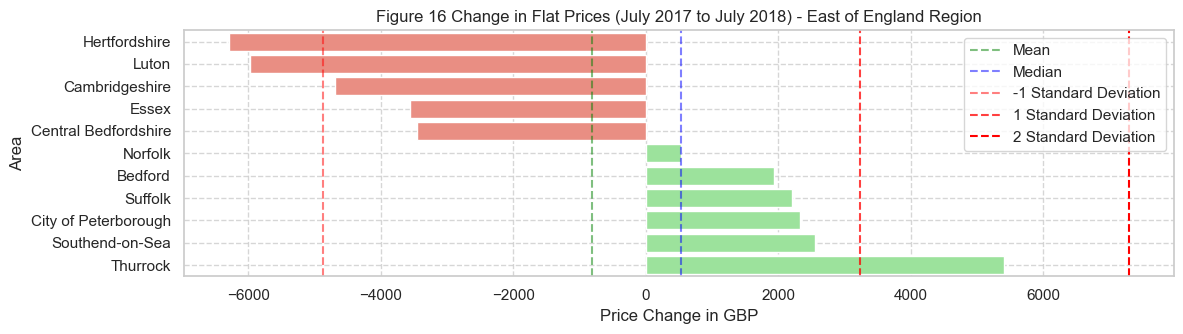

In [26]:
# filter for a specific region
EE_df = df_price_change[df_price_change['Region'] == 'East of England']
# Sort by PriceChange in ascending order
EE_df = EE_df.sort_values(by='PriceChange', ascending=True)

sns.set(style="whitegrid")

# create a copy to avoid SettingWithCopyWarning
EE_df = EE_df.copy()

# determine colors based on positive and negative changes
EE_df['Colour'] = ['salmon' if change <= 0 else 'lightgreen' for change in EE_df['PercentChange']]

# plot the change in price
plt.figure(figsize=(12, 3.5))
sns.barplot(x='PriceChange', y='Area', data=EE_df, palette=EE_df['Colour'])
plt.axvline(x=EE_df['PriceChange'].mean(), color='green', linestyle='--', alpha=0.5, label='Mean')
plt.axvline(x=EE_df['PriceChange'].median(), color='blue', linestyle='--', alpha=0.5, label='Median')
plt.axvline(x=EE_df['PriceChange'].mean() - EE_df['PriceChange'].std(), color='red', linestyle='--', alpha=0.5, label='-1 Standard Deviation')
plt.axvline(x=EE_df['PriceChange'].mean() + EE_df['PriceChange'].std(), color='red', linestyle='--', alpha=0.75, label='1 Standard Deviation')
plt.axvline(x=EE_df['PriceChange'].mean() + 2*EE_df['PriceChange'].std(), color='red', linestyle='--', alpha=1, label='2 Standard Deviation')
plt.xlabel('Price Change in GBP')
plt.ylabel('Area')
plt.grid(True, linestyle='--', alpha=0.8)
plt.title('Figure 16 Change in Flat Prices (July 2017 to July 2018) - East of England Region')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

From Figure 16, we can observe:

The areas of Hertfordshire, Luton, Cambridgeshire, Essex and Central Bedfordshire show negative changes in flat prices, indicating a decline in the flat market East of England region for the period from July 2017 to July 2018.

Norfolk, Bedford, Suffolk, City of Peterborough, Southend-on-Sea, and Thurrock areas exhibit positive changes in flat prices, suggesting growth in the real estate market for flats.

The spread and dispersion of bars highlight the diverse flat market conditions across different areas in the East of England region, emphasising the variability in price change. There are no aparent outliers.

Figure 17 depicts a horizontal bar plot illustrating the change in flat prices across various areas within the **South East** region during the period from July 2017 to July 2018, providing a quantitative measure of the price fluctuations and displays the mean, the median and the standard variation providing additional insights into the distribution of the data.

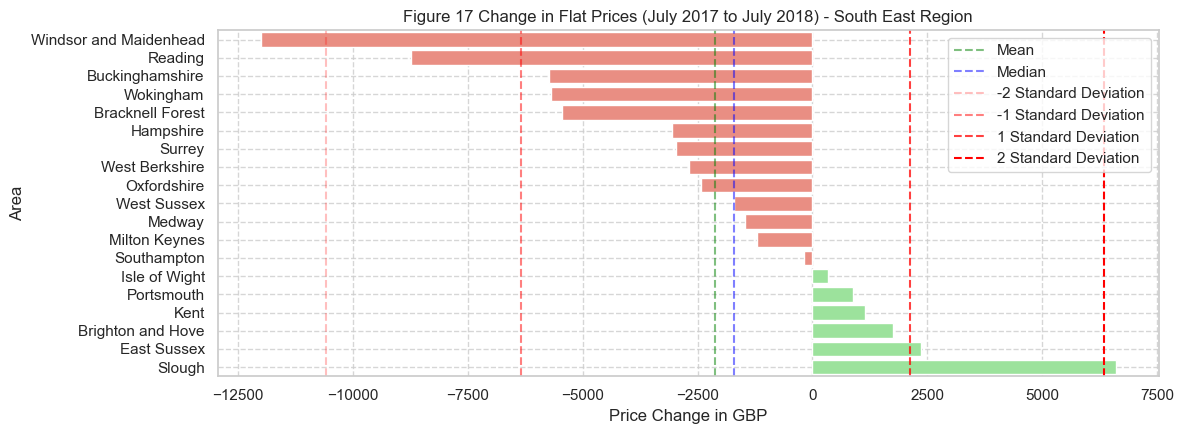

In [27]:
# filter for a specific region
SE_df = df_price_change[df_price_change['Region'] == 'South East']
# Sort by PriceChange in ascending order
SE_df = SE_df.sort_values(by='PriceChange', ascending=True)

sns.set(style="whitegrid")

# create a copy to avoid SettingWithCopyWarning
SE_df = SE_df.copy()

# determine colors based on positive and negative changes
SE_df['Colour'] = ['salmon' if change <= 0 else 'lightgreen' for change in SE_df['PercentChange']]

# plot the change in price
plt.figure(figsize=(12, 4.5))
sns.barplot(x='PriceChange', y='Area', data=SE_df, palette=SE_df['Colour'])
plt.axvline(x=SE_df['PriceChange'].mean(), color='green', linestyle='--', alpha=0.5, label='Mean')
plt.axvline(x=SE_df['PriceChange'].median(), color='blue', linestyle='--', alpha=0.5, label='Median')
plt.axvline(x=SE_df['PriceChange'].mean() - 2*SE_df['PriceChange'].std(), color='red', linestyle='--', alpha=0.25, label='-2 Standard Deviation')
plt.axvline(x=SE_df['PriceChange'].mean() - SE_df['PriceChange'].std(), color='red', linestyle='--', alpha=0.5, label='-1 Standard Deviation')
plt.axvline(x=SE_df['PriceChange'].mean() + SE_df['PriceChange'].std(), color='red', linestyle='--', alpha=0.75, label='1 Standard Deviation')
plt.axvline(x=SE_df['PriceChange'].mean() + 2*SE_df['PriceChange'].std(), color='red', linestyle='--', alpha=1, label='2 Standard Deviation')
plt.xlabel('Price Change in GBP')
plt.ylabel('Area')
plt.grid(True, linestyle='--', alpha=0.8)
plt.title('Figure 17 Change in Flat Prices (July 2017 to July 2018) - South East Region')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

From Figure 17, we can observe:

The areas in the South East Region predominantly exhibit negative changes in flat prices. Windsor and Maidenhead, and Reading stand out with significantly high negative changes in flat prices, indicating a significant decline decline in the estate market for flats during the period from July 2017 to July 2018.

From the areas with South East region, Slough displays an extremely large positive change.

The spread and dispersion of bars highlight the diverse real estate market conditions across different areas in the South East, emphasising the variability in price change

Figure 18 depicts a horizontal bar plot illustrating the change in flat prices across various areas within the **South West** region during the period from July 2017 to July 2018, providing a quantitative measure of the price fluctuations and displays the mean, the median and the standard variation providing additional insights into the distribution of the data.

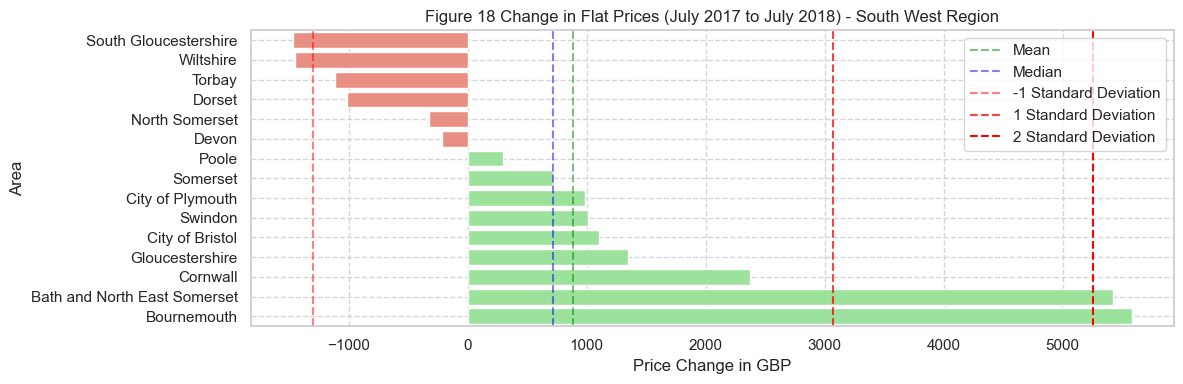

In [28]:
# filter for a specific region
SW_df = df_price_change[df_price_change['Region'] == 'South West']
# Sort by PriceChange in ascending order
SW_df = SW_df.sort_values(by='PriceChange', ascending=True)

sns.set(style="whitegrid")

# create a copy to avoid SettingWithCopyWarning
SW_df = SW_df.copy()

# determine colors based on positive and negative changes
SW_df['Colour'] = ['salmon' if change <= 0 else 'lightgreen' for change in SW_df['PercentChange']]

# plot the change in price
plt.figure(figsize=(12, 4))
sns.barplot(x='PriceChange', y='Area', data=SW_df, palette=SW_df['Colour'])
plt.axvline(x=SW_df['PriceChange'].mean(), color='green', linestyle='--', alpha=0.5, label='Mean')
plt.axvline(x=SW_df['PriceChange'].median(), color='blue', linestyle='--', alpha=0.5, label='Median')
plt.axvline(x=SW_df['PriceChange'].mean() - SW_df['PriceChange'].std(), color='red', linestyle='--', alpha=0.5, label='-1 Standard Deviation')
plt.axvline(x=SW_df['PriceChange'].mean() + SW_df['PriceChange'].std(), color='red', linestyle='--', alpha=0.75, label='1 Standard Deviation')
plt.axvline(x=SW_df['PriceChange'].mean() + 2*SW_df['PriceChange'].std(), color='red', linestyle='--', alpha=1, label='2 Standard Deviation')
plt.xlabel('Price Change in GBP')
plt.ylabel('Area')
plt.grid(True, linestyle='--', alpha=0.8)
plt.title('Figure 18 Change in Flat Prices (July 2017 to July 2018) - South West Region')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

From Figure 18, we can observe:

The areas of South Gloucestershire and Wiltshire exhibit the highest negative change in the South West region, indicating a decline in the market for flats during the period from July 2017 to July 2018. 

Bournemouth, Bath and North East Somerset display extremely high positive changes in flat prices and stand out as outliers.

The spread and dispersion of bars highlight the diverse real estate market conditions across different areas in the South West, emphasising the variability in price changes.

Figure 19 depicts a horizontal bar plot illustrating the change in flat prices across various areas within the **London** region during the period from July 2017 to July 2018, providing a quantitative measure of the price fluctuations and displays the mean, the median and the standard variation providing additional insights into the distribution of the data.

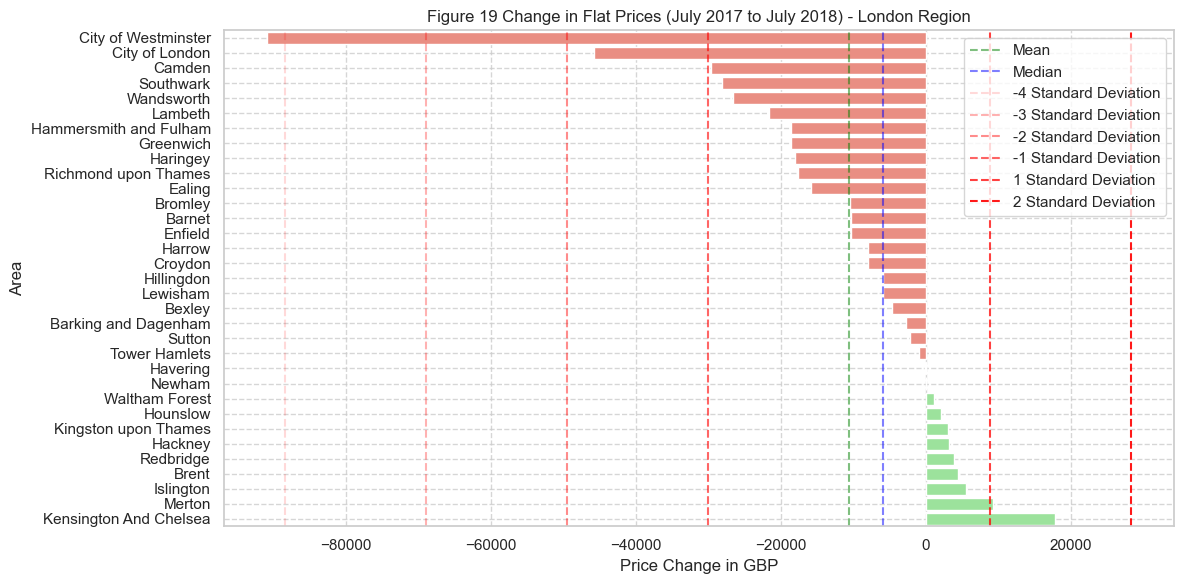

In [29]:
# filter for a specific region
L_df = df_price_change[df_price_change['Region'] == 'London']
# Sort by PriceChange in ascending order
L_df = L_df.sort_values(by='PriceChange', ascending=True)

sns.set(style="whitegrid")

# create a copy to avoid SettingWithCopyWarning
L_df = L_df.copy()

# determine colors based on positive and negative changes
L_df['Colour'] = ['salmon' if change <= 0 else 'lightgreen' for change in L_df['PercentChange']]

# plot the change in price
plt.figure(figsize=(12, 6))
sns.barplot(x='PriceChange', y='Area', data=L_df, palette=L_df['Colour'])
plt.axvline(x=L_df['PriceChange'].mean(), color='green', linestyle='--', alpha=0.5, label='Mean')
plt.axvline(x=L_df['PriceChange'].median(), color='blue', linestyle='--', alpha=0.5, label='Median')
plt.axvline(x=L_df['PriceChange'].mean() - 4*L_df['PriceChange'].std(), color='red', linestyle='--', alpha=0.15, label='-4 Standard Deviation')
plt.axvline(x=L_df['PriceChange'].mean() - 3*L_df['PriceChange'].std(), color='red', linestyle='--', alpha=0.3, label='-3 Standard Deviation')
plt.axvline(x=L_df['PriceChange'].mean() - 2*L_df['PriceChange'].std(), color='red', linestyle='--', alpha=0.45, label='-2 Standard Deviation')
plt.axvline(x=L_df['PriceChange'].mean() - L_df['PriceChange'].std(), color='red', linestyle='--', alpha=0.6, label='-1 Standard Deviation')
plt.axvline(x=L_df['PriceChange'].mean() + L_df['PriceChange'].std(), color='red', linestyle='--', alpha=0.75, label='1 Standard Deviation')
plt.axvline(x=L_df['PriceChange'].mean() + 2*L_df['PriceChange'].std(), color='red', linestyle='--', alpha=0.9, label='2 Standard Deviation')
plt.xlabel('Price Change in GBP')
plt.ylabel('Area')
plt.grid(True, linestyle='--', alpha=0.8)
plt.title('Figure 19 Change in Flat Prices (July 2017 to July 2018) - London Region')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

From Figure 18, we can observe:

The London region exhibits predominantly negative price changes across the majority of its boroughs.

The areas of City of Westminister, City of London, Camden, Southwark, and Wandsworth stand out as outliers with exceptionally large negative price changes., with City of Westminster having the most significant negative change.

Kensington and Chelsea particularly, stand out with the biggest positive change.

The spread and dispersion of bars highlight the diverse real estate market conditions across different boroughs in London, emphasizing the variability in price changes.

### Section 3.5 Price Change Comparison between Regions

Based on the visualisations presented in Section 3  so far, focusing on the sub-national division of England, the following observation can be made:

**Mixture of positive and negative price change:**
- The North West demonstrates a mix of thriving areas and areas experiencing challenges in the real estate market for flats.
- Yorkshire and The Humber's flat market is diverse, with specific areas contributing to an overall positive trend.
- The East of England exhibits a blend of negative and positive changes across different areas.
- In the South East, diverse patterns are observed, including both negative and positive changes.
- South West presents a mixture of positive and negative price changes.
- London displays a heterogeneous flat market.

**Negative Trends:**
- The North East experiences general price declines, except for Newcastle upon Tyne, which stands as an outlier.

**Exclusively Positive:**
- The East Midlands region presents exclusively positive price changes, with Leicester, as an outlier, showing significant positive shifts.

**Positive Outlook:**
- The West Midlands region features areas experiencing notable positive changes, indicating a predominantly positive trend.
 
**Negative Outliers**
- Negative outliers for price change areas are visibly observed in the regions of London and South East.

**Economic Disparity**
- Regions with larger cities like London in London region, and Manchester in North West region exhibit more variability, possibly reflecting economic disparities.

In Section 2 of our analysis, we noted that the nine regions of England display regional disparities. While properties within the same sub-national areas demonstrate similar trends, there are variations in the magnitude of these trends. To facilitate a comparison between areas in different regions, we will utilise the percentage change in price as an indicator, focusing on the relative shifts rather than the absolute quantitative measure of price change.

Figure 20 visually represents the variation in percentage price changes across different areas within each region, highlighting the diversity of flat price change.

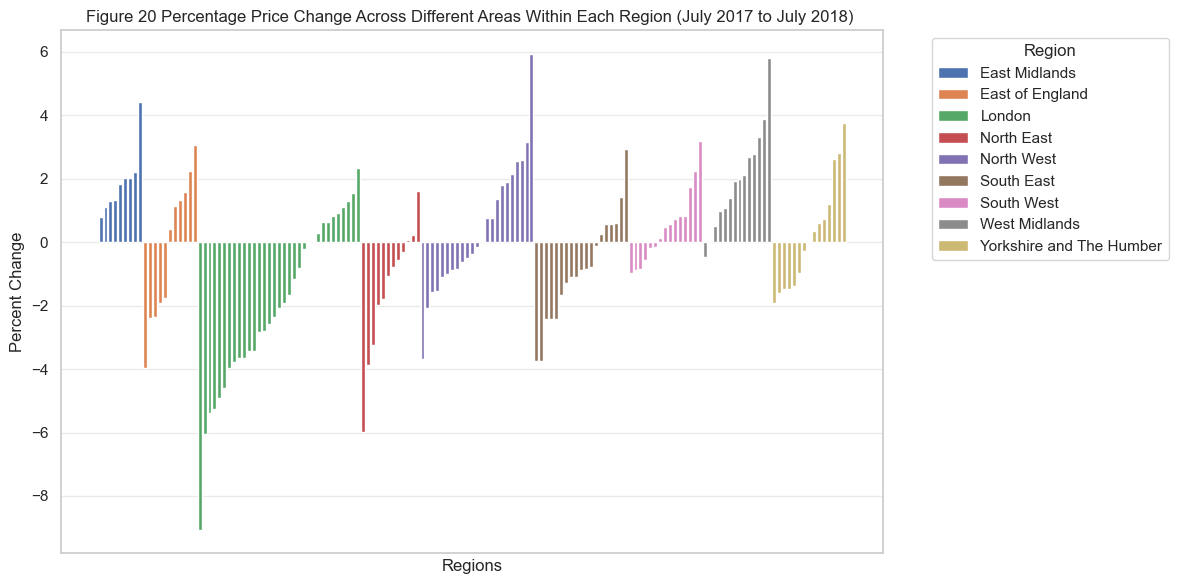

In [30]:
sorted_regions = df_price_change['Region'].unique()
sorted_regions.sort()
plt.figure(figsize=(12, 6))
for region in sorted_regions:
    group = df_price_change[df_price_change['Region'] == region]
    group = group.sort_values(by='PercentChange')
    plt.bar(group['Area'], group['PercentChange'], label=region, alpha=1)

plt.xlabel('Regions')
plt.xticks([])
plt.ylabel('Percent Change')
plt.title('Figure 20 Percentage Price Change Across Different Areas Within Each Region (July 2017 to July 2018) ')
plt.grid(alpha=0.4)
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

From Figure 20, we can observe:

- Regional Disparities and Variability within Regions
The figure reveals substantial regional disparities in price change across different areas, possibly because economic factors vary significantly from one region to another. Moreover, each region has areas with diverse price changes possibly due to urbanisation levels, indicating economic heterogeneity.
- Positive Trends in the Midlands
While the East Midlands exhibits only positive price changes, and West Midlands exhibits two areas with slight negative price changes, both areas showcase distinctive positive price changes, indicating that the Midlands regions are possibly experiencing economic growth or positive development in the period from July 2017 to July 2018.
- Overall Positive Trends
South West and North West exhibit positive economic momentum.
- Negative Trend
North East showcases a distinctive negative trend in price change for flats.
South East presents some positive price changes, but the trend is predominantly negative.
- London
Even though London displays a mix of positive and negative price changes, the price change trend is evidently negative. Certain boroughs showcase notable negative percentage changes, possibly indicating economic challenges like high living costs, economic shifts or local issues.
 - Mixed Trends
The East of England displays both positive and negative price changes, possibly due to extreme economic diversity or extreme differences between urban and rural areas.

Figure 21 visualises the distribution of percentage price changes across different regions. Each strip represents an area, and the position on the y-axis indicates the percentage change in price. Outlying strips may indicate areas with extreme changes.

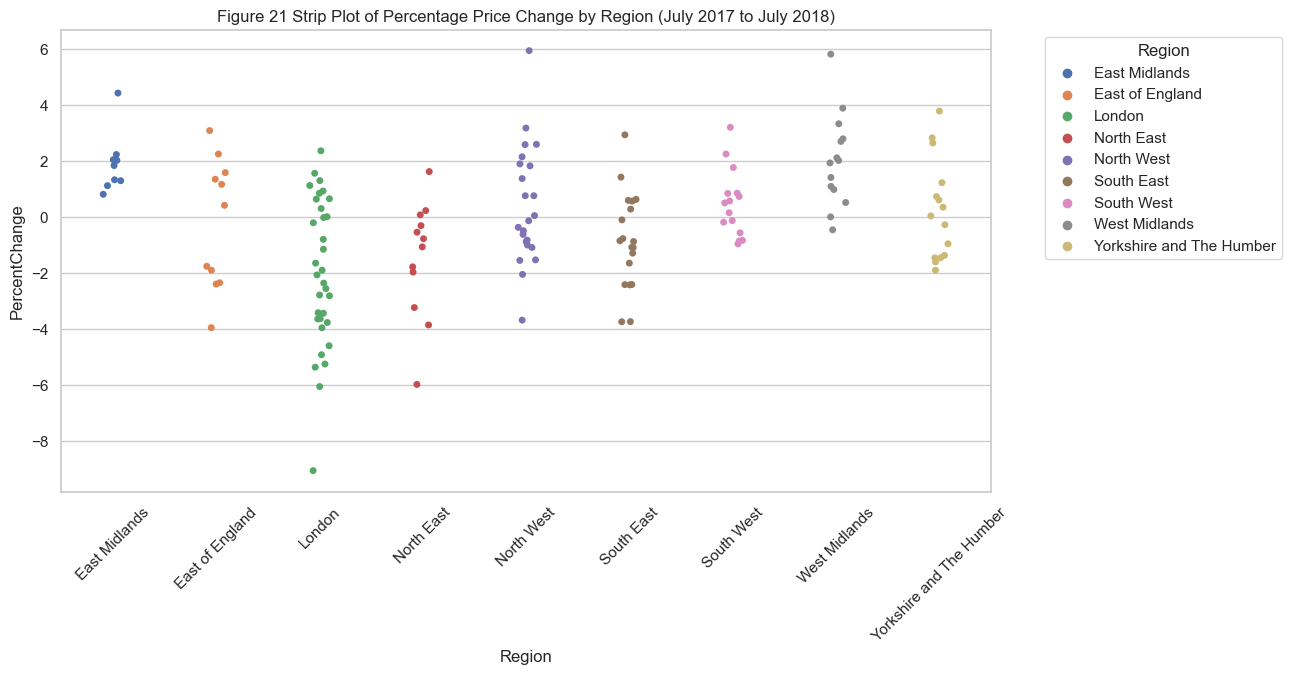

In [31]:
df_price_change = df_price_change.sort_values(by='Region')
plt.figure(figsize=(12, 6))
sns.stripplot(x='Region', y='PercentChange', data=df_price_change, jitter=True, alpha=1, hue='Region')
plt.xticks(rotation=45)
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Figure 21 Strip Plot of Percentage Price Change by Region (July 2017 to July 2018)')
plt.show()

From Figure 21, we can observe:

East Midlands displays a relatively narrow distribution of price change, indicating that the majority of the areas experience a moderate percentage price change, with only one significant outlier.

East of England displays a wider distribution compared to East Midlands, indicating greater variability in percentage price changes. An outlier on the negative side of the distribution suggests an area with a substantial decrease in flat prices.

London exhibits the widest distribution across all regions, indicating a diverse range of price changes across its boroughs. Notably, there are two significant outliers suggesting a significant decline in flat prices in these areas.

North East displays a concentration in the negative price change, with an evident positive outlier, indicating a substantial increase in prices compared to the rest of the region.

North West displays a diverse distribution, with both positive and negative changes. A positive outlier is evident, indicating a notable increase in flat prices, and a notable negative outlier indicates an area with a significant decrease. 

South East presents a relatively balanced distribution of percentage price changes. Similarly to the North West region, there are notable positive and negative outliers.

South West presents a concentration of areas with positive percentage price changes. A positive outlier suggests a considerable increase in prices for that area.

West Midlands displays a relatively narrow distribution of percentage price changes, indicating a consistent pattern of positive changes with one significant positive outlier.

Yorkshire and The Humber display a diverse distribution with both positive and negative outliers.

Positive outliers might be indicative of regions experiencing an overall positive flat price change. North West contains the highest outlier of percentage price change for flats.
Negative outliers might be indicative of regions experiencing negative trends.London contains the lowest outlier of percentage price change for flats.

## Section 4 Statistical Analysis

In this section we investigate whether the change in the price of flats has affected all the regions similarly.

### Section 4.1 Cross-tabulation

The cross-tabulation is a way to summarize and explore the relationship between two categorical variables. In our case, we are interested in how the change in flat prices (increase or decrease) is distributed across the nine different regions. 

In [32]:
# ddd a new column Change based on PriceChange
df_price_change['Change'] = df_price_change['PriceChange'].apply(lambda x: 'Increase' if x > 0 else 'Decrease')

# create a cross-tabulation for Region and Change
cross_table = pd.crosstab(index=df_price_change['Region'], columns=df_price_change['Change'])
#display
cross_table

Change,Decrease,Increase
Region,,
East Midlands,0,9
East of England,5,6
London,23,10
North East,9,3
North West,12,11
South East,13,6
South West,6,9
West Midlands,2,12
Yorkshire and The Humber,7,8


The cross-tabulation table shows, for each region, how many areas experienced a decrease and how many experienced an increase in flat prices.

From the cross-tabulation table, we can observe the following: <br>
East Midlands is the region with the minimum areas experiencing decreasing flat price change. <br>
London exhibits the highest areas experiencing decreasing flat price changes. <br>
North East has the lowest number of areas with increasing flat price change. <br>
West Midlands has the most areas exhibiting an increasing flat price change.

### Section 4.2 Chi-square test (using the G-test statistic) 

The chi-square test is used to determine whether there is a significant association between two categorical variables. In our case, it will help assess whether the distribution of flat price changes is significantly different across regions.

The **Null Hypothesis (H<sub>0</sub>)** assumes that there is no significant difference: There is no significant difference in the distribution of flat price changes across regions.

The **Alternative Hypothesis (H<sub>a</sub>)** suggests that there is a significant differnce: TThere is a significant difference in the distribution of flat price changes across regions.

We choose a standard **significance level of 0.05**.

Justification: The choice of significance level is a critical decision in hypothesis testing. The significance level represents the probability of rejecting a true null hypothesis, also known as a Type I error. Conventional significance levels are 0.05 and 0.01. A significance level of 0.05 implies that we are willing to accept a 5% chance of committing a Type I error, respectively 0.01 implies a 1% chance. In the context of flat price changes, there are no severe consequences claiming an effect when there is not one. Additionally, lowering the significance level to 0.01 would reduce the risk of Type I errors but increase the risk of Type II errors: failing to reject a false null hypothesis.

We would perform a Chi-square test using the G-test statistics to to determine whether there is evidence that the regions differ.

We would obtain the chi-square statistic, its respective p-value and the G-test statistics with it's respective p-value.

Chi-square Statistic and the G-test statistics quantify the difference between the expected and observed frequencies in the contingency table. 

p-value is the probability of obtaining the observed results (or more extreme) if the null hypothesis is true.

In [34]:
test_stat, p_value, dof, expected = stats.chi2_contingency(cross_table)
print('Pearson\'s Chi-squared Statistic:')
print(f'The Chi-square statistic is equal to {test_stat}.')
print(f'The p-value is equal to {p_value}.')
print()
test_stat, p_value, dof, expected = stats.chi2_contingency(cross_table, correction=False, lambda_ = "log-likelihood")
print('Log Likelihood Ratio (G-Test) Statistic:')
print('The G-test statistic is %4.2f' % test_stat)
print('The p-value is %4.3f %%' % (100 * p_value))

Pearson's Chi-squared Statistic:
The Chi-square statistic is equal to 27.595360429623703.
The p-value is equal to 0.0005576314604275128.

Log Likelihood Ratio (G-Test) Statistic:
The G-test statistic is 32.19
The p-value is 0.009 %


### Section 4.3 Interpretation

The G-test Statistic is a measure of how much the observed counts in the cross-tabulation table deviate from what we would expect under the assumption that there is no association between the two categorical variables: region and change in flat prices. The obtained value for the G-test Statistic is 32.19, which is relatively large, indicating a substantial difference between the observed and expected frequencies.

The p-value associated with the G-test Statistic is 0.009. The p-value is the probability of obtaining the observed distribution of flat price changes (or more extreme) if there is no actual difference between regions.

Our chosen significance level is 0.05, with justification given in Section 4.2.

A commonly used significance level is 0.05.

**Interpretation:**

**Null Hypothesis (H<sub>0</sub>):** There is no significant difference in the distribution of flat price changes across regions.

**Alternative Hypothesis (H<sub>a</sub>):** There is a significant difference in the distribution of flat price changes across regions.

**Comparison with Significance Level (α):**
   - If p ≤ α: We reject the null hypothesis.
   - If p > α: We fail to reject the null hypothesis.

In our case, p = 0.009 is significantly less than α = 0.05.

Therefore, we reject the null hypothesis.

The chi-square test results provide evidence of a significant association between the regions and the changes in flat prices.
There is significant evidence to suggest that there is a statistically significant association between the region and the change in flat prices. The change in flat prices is not uniform across all regions. There are regional differences. The distribution of flat price changes varies significantly from what would be expected if there were no regional differences. The fluctuations in flat price change, observed in Section 3, are unlikely to be due to random chance.

Even if we use the Pearson's statistics, and both the statistic and the p-value change, the decision (reject the null hypothesis) is unchanged.

**What we Can Determine:**

- Statistical Significance: The G-test Statistic is 32.19 with a p-value of 0.009. The p-value is less than the chosen significance level and less than the conventional significance level of 0.01, indicating that the observed differences in the distribution of flat price changes for the regions are statistically significant.

- Rejection of the Null Hypothesis: Given that the p-value is below the significance level, we can reject the null hypothesis, which presumes that there is no significant difference in the distribution of flat price changes across regions. The rejection suggests that there is indeed a significant difference. Moreover, there is no statistical evidence that the change in the price of flats has affected all the regions similarly.

- Regional Variability: The rejection of the null hypothesis implies that the regions do not experience flat price changes uniformly. Some regions are more likely to experience increases or decreases in flat prices compared to others.

**What we Cannot Determine:**

- Causation: While we can identify a statistical association, the chi-square test does not establish causation. It does not provide insight into why there are differences. The chi-square test only confirms that the differences exist. Further exploration and analysis can provide more nuanced insights into the nature of these differences.

- Magnitude of Differences: The test does not quantify how much the regions differ. It confirms the presence of a difference but does not provide a measure of the extent of the difference.

- Direction of Causation: The test does not reveal the direction of the relationship. It only indicates that there is a difference but does not specify whether particular regions are more likely to experience price increases or decreases.

In summary, the results support the notion of significant regional variations in flat price changes. However, further analysis would be needed to understand the specific nature of these differences and the factors contributing to them.